In [1]:
%pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [2]:
juarez = pd.read_excel('DATOS_Historicos.xlsx', sheet_name='SURESTE2')
san_nico = pd.read_excel('DATOS_Historicos.xlsx', sheet_name='NORTE2')

# Comprensión de los datos

1. Dimensión del dataset

In [3]:
# Dimensiones para todas las estaciones
hojas = ["SURESTE","NORESTE","CENTRO","NOROESTE","SUROESTE","NOROESTE2","NORTE","SUROESTE2","SURESTE2",
"SURESTE3","SUR","NORTE2","NORESTE2","NORESTE3","NOROESTE3"]
for hoja in hojas:
  df = pd.read_excel('DATOS_Historicos.xlsx', sheet_name=hoja)
  rows_df, cols_df = df.shape
  print(f'Estación {hoja} {cols_df} columnas y con {rows_df} filas')

Estación SURESTE 16 columnas y con 14255 filas
Estación NORESTE 16 columnas y con 14255 filas
Estación CENTRO 16 columnas y con 14255 filas
Estación NOROESTE 16 columnas y con 14255 filas
Estación SUROESTE 16 columnas y con 14255 filas
Estación NOROESTE2 16 columnas y con 14255 filas
Estación NORTE 16 columnas y con 14255 filas
Estación SUROESTE2 16 columnas y con 14255 filas
Estación SURESTE2 16 columnas y con 14255 filas
Estación SURESTE3 16 columnas y con 14255 filas
Estación SUR 16 columnas y con 14254 filas
Estación NORTE2 16 columnas y con 14255 filas
Estación NORESTE2 16 columnas y con 14255 filas
Estación NORESTE3 16 columnas y con 14254 filas
Estación NOROESTE3 16 columnas y con 6237 filas


In [4]:
# Para las estaciones que nos interesan
rows_juarez, cols_juarez = juarez.shape
rows_san_nico, cols_san_nico = san_nico.shape

print(f'Estación Juarez {cols_juarez} columnas y con {rows_juarez} filas')
print(f'Esación San Nicolás {cols_san_nico} columnas y con {rows_san_nico} filas')

Estación Juarez 16 columnas y con 14255 filas
Esación San Nicolás 16 columnas y con 14255 filas


2. Descripción de las variables

In [5]:
juarez.describe()

CO            NO           NO2           NOX            O3  \
count  12933.000000  13691.000000  13872.000000  13871.000000  13681.000000   
mean       1.457125     12.662348     13.220941     25.748201     27.262554   
std        0.668715     26.938311     10.084289     33.837180     16.152447   
min        0.000000      0.500000      0.600000      1.100000      3.000000   
25%        0.950000      3.100000      6.200000      9.600000     16.000000   
50%        1.520000      4.700000      9.600000     14.500000     24.000000   
75%        1.800000      8.700000     17.300000     26.200000     36.000000   
max        7.090000    380.800000     76.200000    400.900000    158.000000   

               PM10         PM2.5           PRS    RAINF            RH  \
count  13782.000000  12567.000000  13869.000000  14248.0  13828.000000   
mean      68.423233     29.271903    722.125424      0.0     57.512222   
std       48.811466     21.286675      2.145813      0.0     21.066064   
min        2.000000      2.000000    686.500000      0.0      1.000000   
25%       41.000000     15.000000    721.100000      0.0     41.000000   
50%       56.000000     23.000000    722.000000      0.0     59.000000   
75%       80.000000     37.000000    723.100000      0.0     75.000000   
max      963.000000    364.000000    728.800000      0.0     92.000000   

                SO2            SR          TOUT           WSR           WDR  
count  13706.000000  14095.000000  13886.000000  13546.000000  13512.000000  
mean       4.987531      0.129497     24.077160      4.692588    125.440497  
std        4.982616      0.186835      7.747574      4.426484     96.636106  
min        0.900000      0.000000     -1.180000      0.100000      1.000000  
25%        3.000000      0.000000     19.370000      1.400000     49.000000  
50%        3.800000      0.006000     24.740000      2.400000     94.000000  
75%        4.900000      0.230000     29.330000      7.400000    196.000000  
max      178.300000      0.644000     43.150000     27.400000    360.000000

In [6]:
tipos = juarez.dtypes
tipos = pd.DataFrame(tipos)

In [7]:
juarez_valores = juarez.describe()
juarez_valores = juarez_valores.transpose()
juarez_valores = juarez_valores[['min', 'max']]
juarez_valores.rename(columns={'min': "min_juarez", "max": "max_juarez"}, inplace=True)

In [8]:
san_nico_valores = san_nico.describe()
san_nico_valores = san_nico_valores.transpose()
san_nico_valores = san_nico_valores[['min', 'max']]
san_nico_valores.rename(columns={'min': "min_san_nico", "max": "max_san_nico"}, inplace=True)

In [9]:
summary = pd.concat([tipos, juarez_valores, san_nico_valores], axis=1)
summary.rename(columns={'': "tipo_dato"}, inplace=True)
summary['tipo'] = 'numerico'
summary.iloc[0, summary.columns.get_loc('tipo')] = 'fecha'
summary
# En esta tabla se ven los tipos de datos de los data frames, el minimo y maximo para cada estacion
# y si son variables categoricos o numericos

0  min_juarez  max_juarez  min_san_nico  max_san_nico  \
date   datetime64[ns]         NaN         NaN           NaN           NaN   
CO            float64        0.00       7.090          0.17         5.210   
NO            float64        0.50     380.800          0.60       365.500   
NO2           float64        0.60      76.200          0.40       113.300   
NOX           float64        1.10     400.900          1.80       410.300   
O3            float64        3.00     158.000          1.00       163.000   
PM10          float64        2.00     963.000          2.00       738.000   
PM2.5         float64        2.00     364.000          1.00       370.000   
PRS           float64      686.50     728.800        680.80       728.200   
RAINF         float64        0.00       0.000          0.00         1.650   
RH            float64        1.00      92.000          1.00        91.000   
SO2           float64        0.90     178.300          1.20        69.600   
SR            float64        0.00       0.644          0.00         0.664   
TOUT          float64       -1.18      43.150         -1.21        43.020   
WSR           float64        0.10      27.400          0.10        29.700   
WDR           float64        1.00     360.000          1.00       360.000   

           tipo  
date      fecha  
CO     numerico  
NO     numerico  
NO2    numerico  
NOX    numerico  
O3     numerico  
PM10   numerico  
PM2.5  numerico  
PRS    numerico  
RAINF  numerico  
RH     numerico  
SO2    numerico  
SR     numerico  
TOUT   numerico  
WSR    numerico  
WDR    numerico

3. Calidad de datos

In [10]:
# valores nulos en porcentaje
juarez.isnull().sum() / juarez.count()
# con esto vemos en que columnas y cuantos valores nulos tenemos
# podemos ver que en PM2.5 hay tiene un 13% de valores nulos

date     0.000000
CO       0.102219
NO       0.041195
NO2      0.027610
NOX      0.027684
O3       0.041956
PM10     0.034320
PM2.5    0.134320
PRS      0.027832
RAINF    0.000491
RH       0.030879
SO2      0.040055
SR       0.011352
TOUT     0.026574
WSR      0.052340
WDR      0.054988
dtype: float64

In [11]:
san_nico.isnull().sum() / san_nico.count()
# Podemos ver que tiene muy pocos valores nulos

date     0.000000
CO       0.006354
NO       0.006780
NO2      0.006567
NOX      0.006567
O3       0.022964
PM10     0.017488
PM2.5    0.075200
PRS      0.007634
RAINF    0.006283
RH       0.009919
SO2      0.028128
SR       0.002602
TOUT     0.006496
WSR      0.006283
WDR      0.008276
dtype: float64

In [12]:
def faltantes(datos):
    fecha_inicial = min(datos['date'])
    fecha_final = max(datos['date'])
    rango_fechas = pd.date_range(start=fecha_inicial, end=fecha_final, freq='H') # creas todas las fechas

    df_fechas_completas = pd.DataFrame({'fecha': rango_fechas}) # haces dataframe

    # Ver que datos no estan
    fechas_faltantes = df_fechas_completas[~df_fechas_completas['fecha'].isin(datos['date'])]

    return fechas_faltantes

In [13]:
faltantes(juarez)

fecha
9763 2023-02-11 19:00:00

In [14]:
faltantes(san_nico)
# Esos son registros que no llegaron a la base de datos

fecha
9763 2023-02-11 19:00:00

In [15]:
# Valores atípicos con zscore por hora y dia de la semana para que sea una comparación justa en los componentes
# En caso de haber valores atipicos, primero se van a graficar para saber que hacer con ellos
juarez['dia_semana'] = juarez['date'].dt.dayofweek
juarez['hora'] = juarez['date'].dt.hour

# Calcular el Z-score por día de la semana y hora para todas las columnas diferentes de fecha
z_scores_juarez = juarez.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())
                                                                    /x.iloc[:, 1:].std()))
z_scores_juarez_outliers = z_scores_juarez > 3 # los que estan mas de 3 desviaicones estandar
print('Sumatoria de Atípicos por columnas en juarez')
z_scores_juarez_outliers.sum()

Sumatoria de Atípicos por columnas en juarez


/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_59865/730317157.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  z_scores_juarez = juarez.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())


CO             99
NO            364
NO2           220
NOX           344
O3             95
PM10          242
PM2.5         191
PRS           139
RAINF           0
RH             73
SO2           308
SR            128
TOUT           41
WSR           173
WDR           102
dia_semana      0
hora            0
dtype: int64

In [16]:
juarez

date    CO     NO   NO2    NOX    O3   PM10  PM2.5  \
0     2022-01-01 00:00:00  7.09  133.6  43.9  177.5  17.0  550.0    NaN   
1     2022-01-01 01:00:00  3.18   28.2  30.4   58.5  11.0  511.0  364.0   
2     2022-01-01 02:00:00  3.60   54.9  35.3   90.1   9.0  260.0    NaN   
3     2022-01-01 03:00:00  3.87   59.3  30.7   90.1   9.0  306.0    NaN   
4     2022-01-01 04:00:00  4.56   88.1  28.4  116.6   9.0  295.0    NaN   
...                   ...   ...    ...   ...    ...   ...    ...    ...   
14250 2023-08-17 19:00:00  0.61    1.6   4.9    6.5  41.0   49.0   13.0   
14251 2023-08-17 20:00:00  0.73    1.6  10.3   12.0  32.0   60.0   16.0   
14252 2023-08-17 21:00:00  0.74    NaN  12.0   13.7  27.0   57.0   14.0   
14253 2023-08-17 22:00:00  0.69    1.5   6.2    7.7  32.0   77.0   15.0   
14254 2023-08-17 23:00:00  0.68    1.3   4.0    5.4  33.0   49.0   13.0   

         PRS  RAINF    RH  SO2     SR   TOUT   WSR    WDR  dia_semana  hora  
0      719.5    0.0  67.0  4.8  0.000  21.75   1.0  319.0           5     0  
1      719.3    0.0  71.0  4.7  0.000  20.87   0.7   19.0           5     1  
2      719.3    0.0  74.0  5.4  0.000  20.02   1.2  290.0           5     2  
3      719.1    0.0  76.0  4.7  0.000  19.36   1.2  248.0           5     3  
4      719.1    0.0  78.0  4.4  0.000  18.69   1.2  272.0           5     4  
...      ...    ...   ...  ...    ...    ...   ...    ...         ...   ...  
14250  720.9    0.0  21.0  2.9  0.022  38.24  12.7   82.0           3    19  
14251  721.0    0.0  23.0  2.8  0.001  36.52  10.5   74.0           3    20  
14252  721.2    0.0  26.0  2.7  0.000  35.09   7.9   87.0           3    21  
14253  721.5    0.0  38.0  3.1  0.000  33.56  12.0  113.0           3    22  
14254  721.8    0.0  47.0  3.8  0.000  32.22   9.4  113.0           3    23  

[14255 rows x 18 columns]

In [17]:
san_nico['dia_semana'] = san_nico['date'].dt.dayofweek
san_nico['hora'] = san_nico['date'].dt.hour

z_scores_san_nico = san_nico.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())
                                                                    /x.iloc[:, 1:].std()))
z_scores_san_nico_outliers = z_scores_san_nico > 3
print('Sumatoria de Atípicos por columnas en San Nicolas')
z_scores_san_nico_outliers.sum()

Sumatoria de Atípicos por columnas en San Nicolas


/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_59865/1530114544.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  z_scores_san_nico = san_nico.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())


CO            231
NO            365
NO2           195
NOX           307
O3            109
PM10          255
PM2.5         168
PRS            75
RAINF         181
RH             55
SO2           239
SR             28
TOUT           37
WSR           146
WDR           268
dia_semana      0
hora            0
dtype: int64

In [18]:
# Hay muchos warnings por los valores faltantes, al rellenarlos, vamos a recalcular el Zscore.

In [19]:
# Para seguir explorando los atípicos, vamos a usar .describe(), para ver como se distribuyen
z_scores_juarez.describe()
# Se pueden ver los Zscores maximos por cada componente
# Se ve que hay malores mayores de 3 hasta 8 desviaciones atípicas, en general si hay zscores altos

CO            NO           NO2           NOX            O3  \
count  12933.000000  13691.000000  13872.000000  13871.000000  13681.000000   
mean       0.797110      0.602223      0.759339      0.659791      0.782792   
std        0.593003      0.790634      0.641344      0.743374      0.612360   
min        0.000000      0.000230      0.000152      0.000000      0.000000   
25%        0.344954      0.276659      0.356955      0.294648      0.299521   
50%        0.717737      0.405292      0.646185      0.492528      0.658549   
75%        1.147898      0.569115      0.936246      0.689001      1.157101   
max        6.377369      8.943171      6.299224      8.261059      5.380287   

               PM10         PM2.5           PRS  RAINF            RH  \
count  13782.000000  12567.000000  13869.000000    0.0  13828.000000   
mean       0.696971      0.748487      0.687925    NaN      0.777835   
std        0.708575      0.653019      0.717414    NaN      0.618750   
min        0.000168      0.000000      0.000000    NaN      0.000000   
25%        0.285000      0.328275      0.219094    NaN      0.305070   
50%        0.536172      0.632781      0.493534    NaN      0.640417   
75%        0.852611      0.955455      0.941160    NaN      1.075005   
max        7.953183      7.270828      8.535663    NaN      4.065703   

                SO2            SR          TOUT           WSR           WDR  \
count  13706.000000  14095.000000  13886.000000  13546.000000  13512.000000   
mean       0.635915      0.766574      0.812574      0.768813      0.808305   
std        0.763804      0.632830      0.572405      0.629725      0.578131   
min        0.000000      0.000144      0.000208      0.000262      0.000000   
25%        0.250540      0.365413      0.374428      0.394879      0.392587   
50%        0.462259      0.505913      0.745277      0.613502      0.722443   
75%        0.723918      1.005018      1.110297      0.925486      1.090432   
max        8.366209      8.201327      3.993842      7.582739      4.341480   

       dia_semana  hora  
count         0.0   0.0  
mean          NaN   NaN  
std           NaN   NaN  
min           NaN   NaN  
25%           NaN   NaN  
50%           NaN   NaN  
75%           NaN   NaN  
max           NaN   NaN

In [20]:
z_scores_san_nico.describe()
# Aca tambien hay valores diferentes, pero se puede ver que hay columnas más altas en
#comparacion con las del sur, como CO, PM2.5 y PRS.

CO            NO           NO2           NOX            O3  \
count  14165.000000  14159.000000  1.416200e+04  14162.000000  13935.000000   
mean       0.713813      0.668490  7.639311e-01      0.717804      0.785278   
std        0.691842      0.735726  6.360622e-01      0.687697      0.609352   
min        0.000000      0.000092  2.624278e-16      0.000089      0.000000   
25%        0.254286      0.329143  3.397049e-01      0.328126      0.321736   
50%        0.552386      0.473644  6.598610e-01      0.573070      0.668536   
75%        0.957359      0.696426  9.762121e-01      0.836491      1.114556   
max        7.027075      7.726909  6.158872e+00      6.807033      5.659668   

               PM10         PM2.5           PRS         RAINF            RH  \
count  14010.000000  13258.000000  14147.000000  10537.000000  14115.000000   
mean       0.692502      0.742046      0.764712      0.261457      0.774074   
std        0.713082      0.660855      0.635113      0.959096      0.623646   
min        0.000000      0.000000      0.000000      0.005624      0.000000   
25%        0.263872      0.296314      0.281332      0.109109      0.294232   
50%        0.539487      0.606105      0.600409      0.129869      0.628040   
75%        0.873264      0.999726      1.092676      0.154314      1.094961   
max        8.285118      8.374105      6.369589      9.111079      3.737941   

                SO2            SR          TOUT           WSR           WDR  \
count  13865.000000  8.969000e+03  14163.000000  14166.000000  14138.000000   
mean       0.684006  8.160532e-01      0.813899      0.753394      0.695084   
std        0.721150  5.676924e-01      0.570727      0.648512      0.710641   
min        0.000330  1.215117e-16      0.000030      0.000350      0.000000   
25%        0.192072  3.944102e-01      0.379262      0.272069      0.220010   
50%        0.543427  7.375047e-01      0.743712      0.600270      0.503643   
75%        0.938006  1.077558e+00      1.108623      1.077161      0.890054   
max        8.402924  9.111079e+00      3.322840      6.063511      6.303924   

       dia_semana  hora  
count         0.0   0.0  
mean          NaN   NaN  
std           NaN   NaN  
min           NaN   NaN  
25%           NaN   NaN  
50%           NaN   NaN  
75%           NaN   NaN  
max           NaN   NaN

# Visualización de datos pre-limpieza

In [21]:
# El punto de la visualización es comparar los valores, es por eso que los voy a juntar en un
# dataframe de prueba para comparar las emciones de las 2 estaciones
juarez['estacion'] = 'juarez'
san_nico['estacion'] = 'san_nico'
df_concatenado = pd.concat([juarez, san_nico], axis=0)
df_concatenado = df_concatenado.reset_index()
#sns.pairplot(df_concatenado, hue = 'estacion');

In [22]:
df_concatenado = df_concatenado.drop(columns=['index', 'hora', 'dia_semana'])

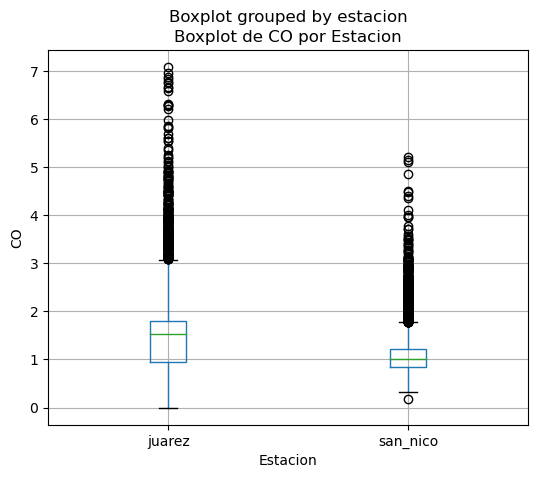

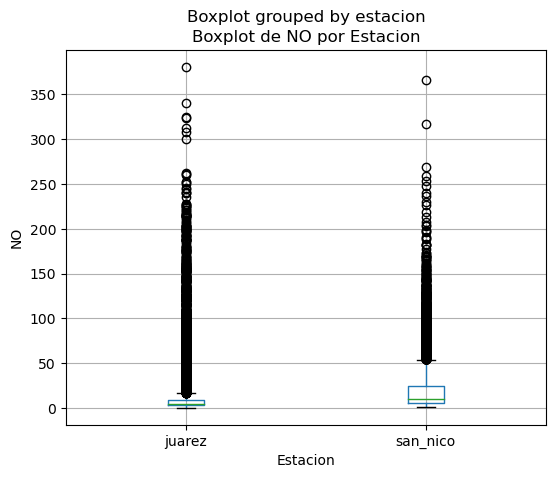

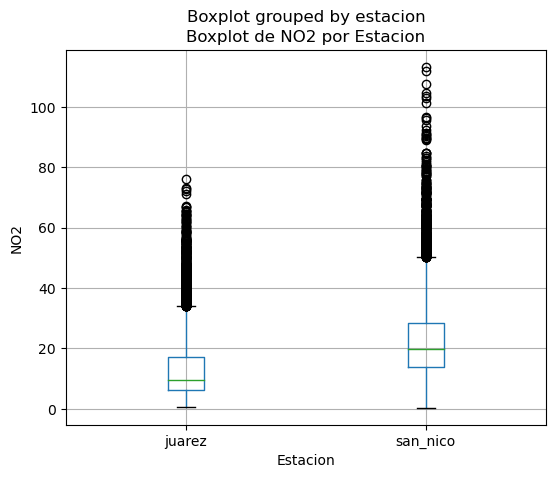

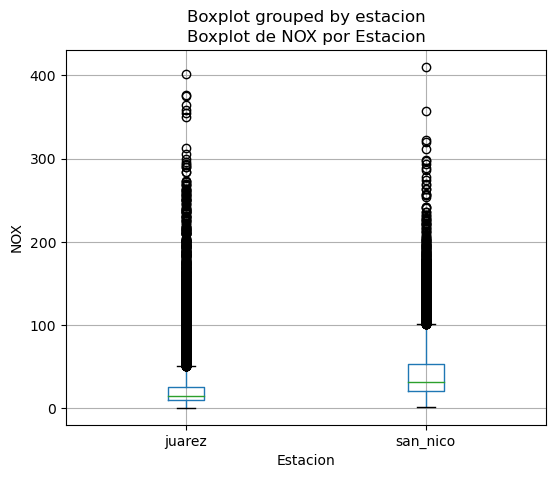

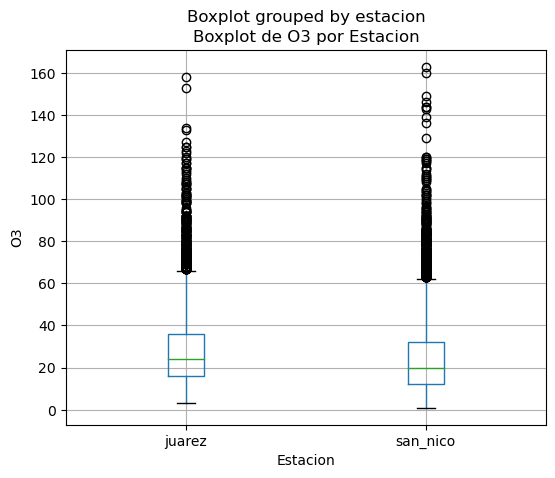

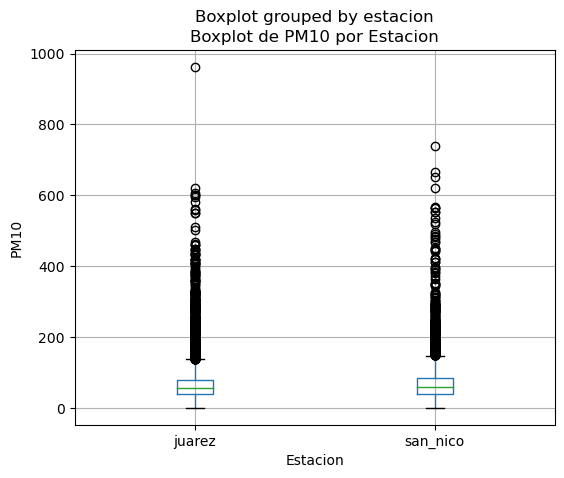

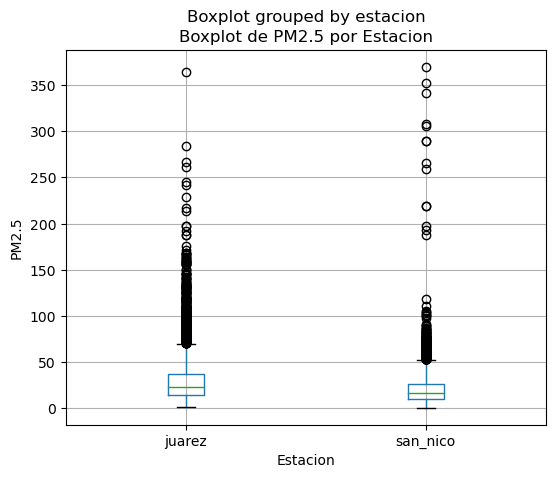

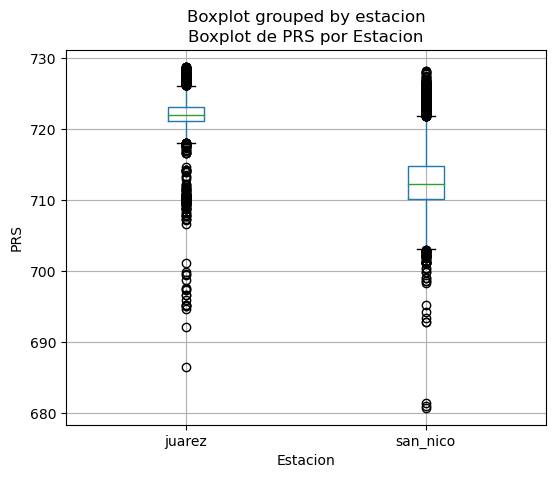

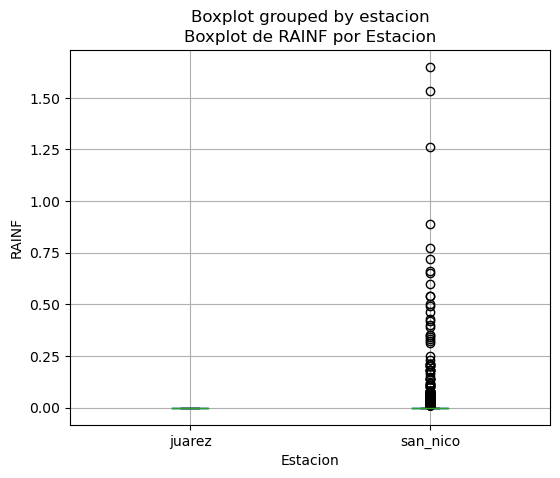

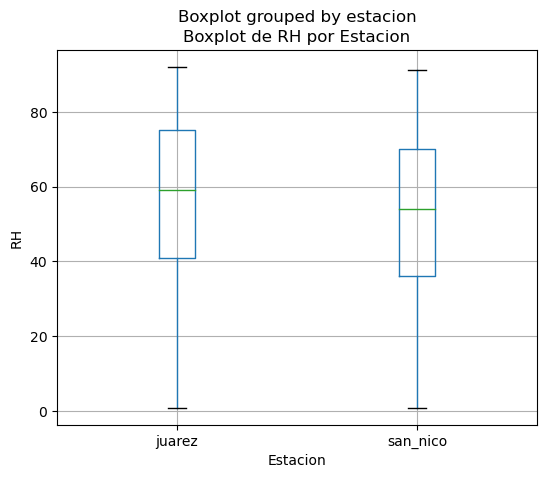

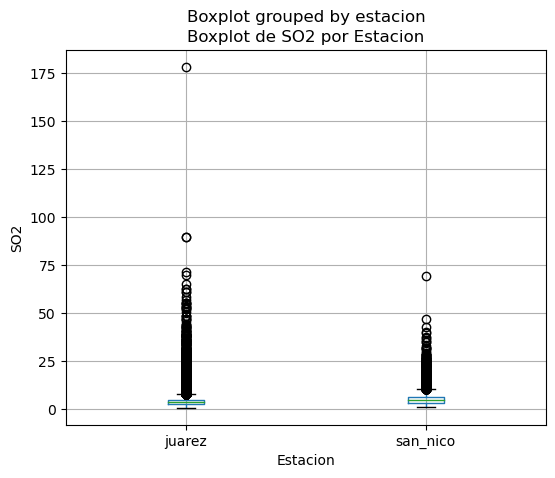

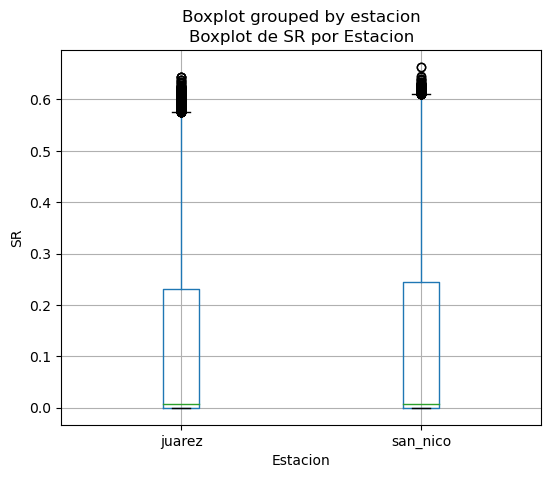

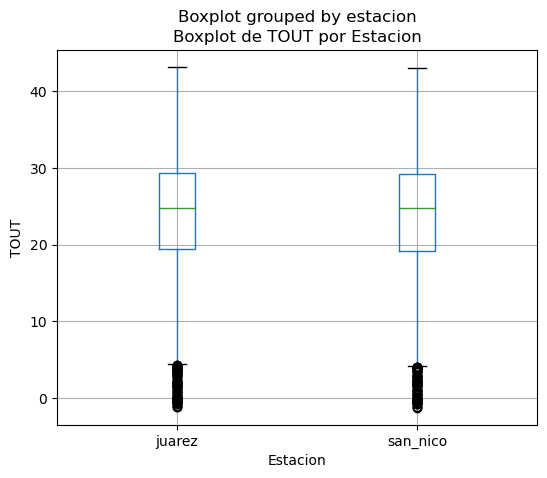

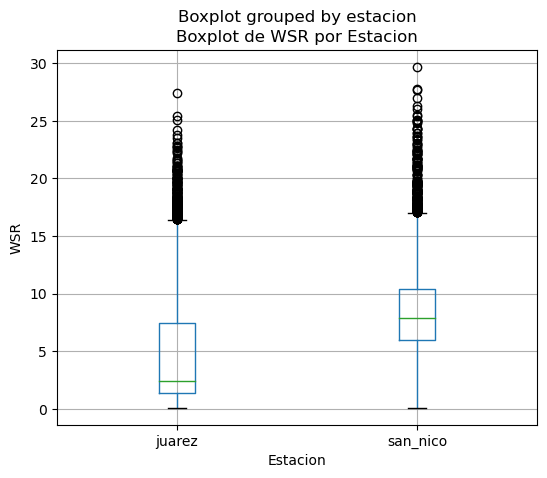

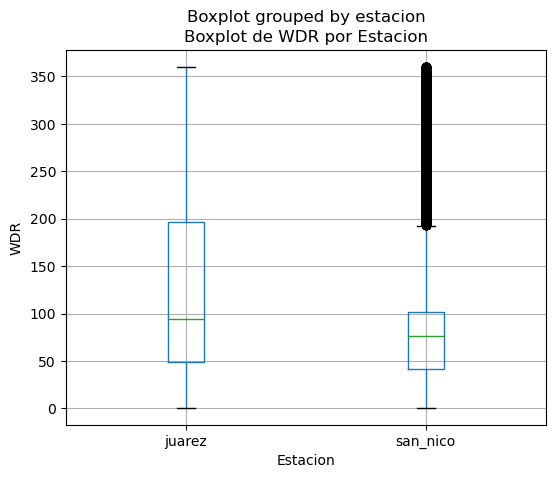

In [23]:
# Hacer boxplot para todas las columnas
for columna in df_concatenado:
    if columna != 'estacion' and columna != 'date':
        df_concatenado.boxplot(column=columna, by='estacion', grid=True, figsize=(6, 5))
        plt.title(f'Boxplot de {columna} por Estacion')
        plt.ylabel(columna)
        plt.xlabel('Estacion')
        plt.show()

De los boxplots se pueden ver que hay muchos valores atípicos, en el CO de Juarez, NO de Juarez, en el NO2 de San Nicolas, en el NOX de Juarez

# Preparación de datos

A. Selecciona el conjunto de datos

In [24]:
# No vamos a exluir columnas, son muy poquitos datos nulos para eliminarlos.

Nosotros queremos ver el impacto del tráfico en horas pica en el medio ambiente, por ello, nuestras columnas objetivo son las emisiones que producen los carros, como  NO, NO2, NOX, y CO y su impacto en el medio ambiente.


B. Limpieza de datos

In [25]:
# Valores duplicados
print(f'Hay {juarez.duplicated().sum()} valores duplicados en Juarez')
print(f'Hay {san_nico.duplicated().sum()} valores duplicados en San Nicolas')

Hay 0 valores duplicados en Juarez
Hay 0 valores duplicados en San Nicolas


In [26]:
san_nico = san_nico.drop(columns=['dia_semana', 'hora'])
juarez = juarez.drop(columns=['dia_semana', 'hora'])
# primer paso agregar los registros que faltan
# es curioso que las 2 estaciones hayan fallado el 11 de febrero a la misma hora.

faltante_juarez = {'date': '2023-02-11 19:00:00', 'CO': np.nan, 'NO': np.nan, 'NO2': np.nan,
                'NOX': np.nan, 'O3': np.nan, 'PM10': np.nan, 'PRS': np.nan, 'RAINF': np.nan, 'RH': np.nan,
                'SO2': np.nan, 'SR': np.nan, 'TOUT': np.nan, 'WSR': np.nan,
                'estacion': 'juarez'}

faltante_san_n = {'date': '2023-02-11 19:00:00', 'CO': np.nan, 'NO': np.nan, 'NO2': np.nan,
                'NOX': np.nan, 'O3': np.nan, 'PM10': np.nan, 'PRS': np.nan, 'RAINF': np.nan, 'RH': np.nan,
                'SO2': np.nan, 'SR': np.nan, 'TOUT': np.nan, 'WSR': np.nan,
                'estacion': 'san_nico'}

In [27]:
# agregandolos a noreste
faltante_san_n = pd.DataFrame([faltante_san_n])
faltante_san_n['date'] = pd.to_datetime(faltante_san_n['date'])
san_nico = pd.concat([san_nico, faltante_san_n], ignore_index=True)

In [28]:
# agregandolos a Sur
faltante_juarez = pd.DataFrame([faltante_juarez])
faltante_juarez['date'] = pd.to_datetime(faltante_juarez['date'])
juarez = pd.concat([juarez, faltante_juarez], ignore_index=True)

In [29]:
juarez['dia_semana'] = juarez['date'].dt.dayofweek
juarez['hora'] = juarez['date'].dt.hour

san_nico['dia_semana'] = san_nico['date'].dt.dayofweek
san_nico['hora'] = san_nico['date'].dt.hour

In [30]:
columnas = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PRS', 'RAINF', 'RH', 'PM2.5', 'WDR',
       'SO2', 'SR', 'TOUT', 'WSR']
# vamos a rellenar los valores nulos con el mismo groupby de hora y dia de la semana
# dentro de un for para que sea rápido
for x in columnas:
    juarez[x] = juarez[x].fillna(juarez.groupby(['dia_semana', 'hora'])[x].transform('mean'))
    san_nico[x] = san_nico[x].fillna(san_nico.groupby(['dia_semana', 'hora'])[x].transform('mean'))

In [31]:
juarez.isnull().sum()

date          0
CO            0
NO            0
NO2           0
NOX           0
O3            0
PM10          0
PM2.5         0
PRS           0
RAINF         0
RH            0
SO2           0
SR            0
TOUT          0
WSR           0
WDR           0
estacion      0
dia_semana    0
hora          0
dtype: int64

In [32]:
san_nico.isnull().sum()

date          0
CO            0
NO            0
NO2           0
NOX           0
O3            0
PM10          0
PM2.5         0
PRS           0
RAINF         0
RH            0
SO2           0
SR            0
TOUT          0
WSR           0
WDR           0
estacion      0
dia_semana    0
hora          0
dtype: int64

In [33]:
# Corregir valores atipicos
# para corregir los atípicos, hay que ser cuidadosos, para no regarla, antes de hacer la correcion
# vamos a hacer la comparacion por hora, para ver las diferencias entre los contaminantes
#sur_filtrado

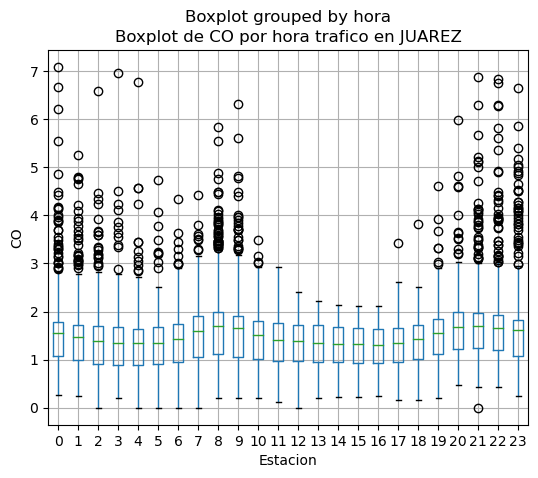

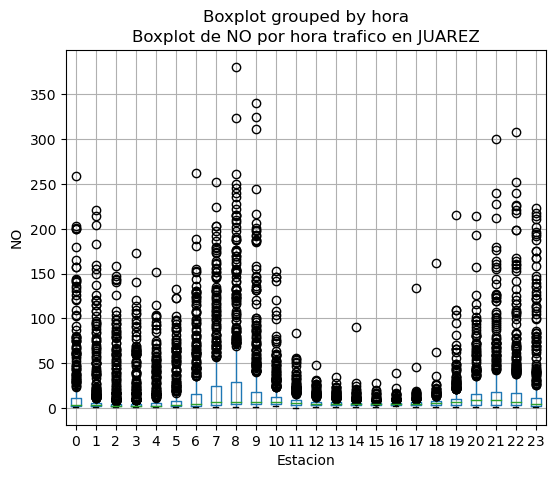

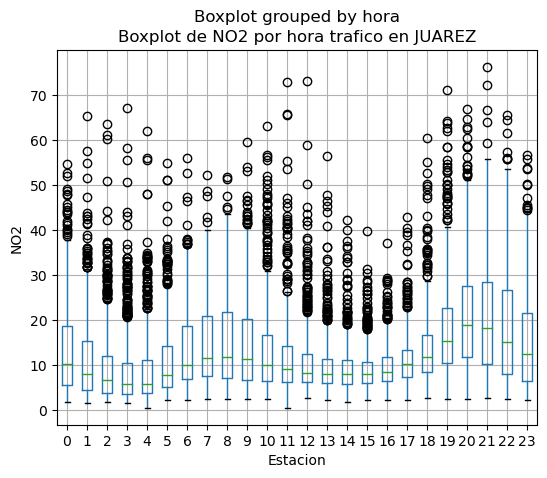

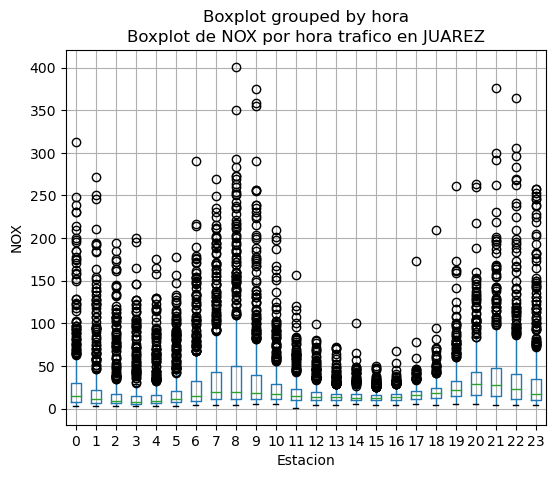

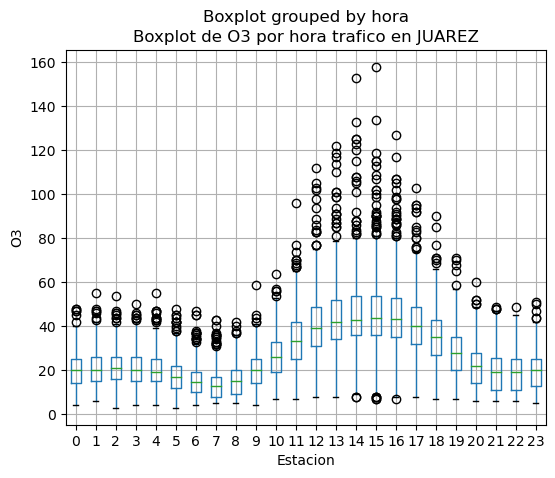

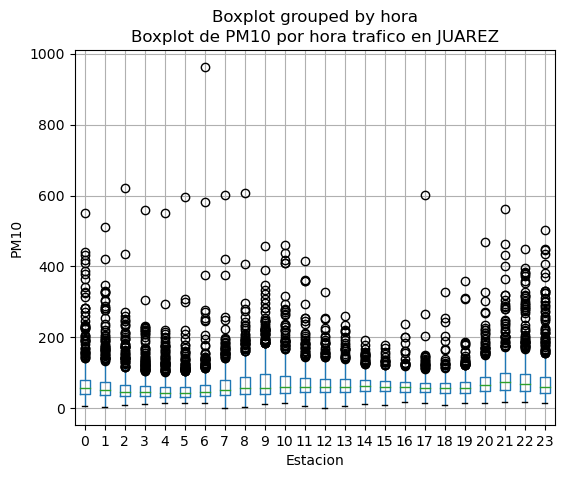

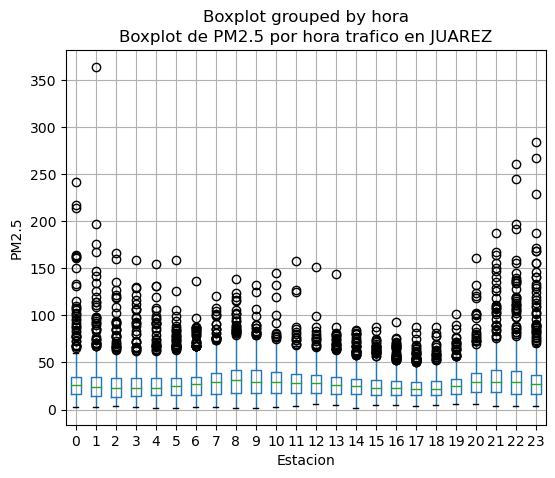

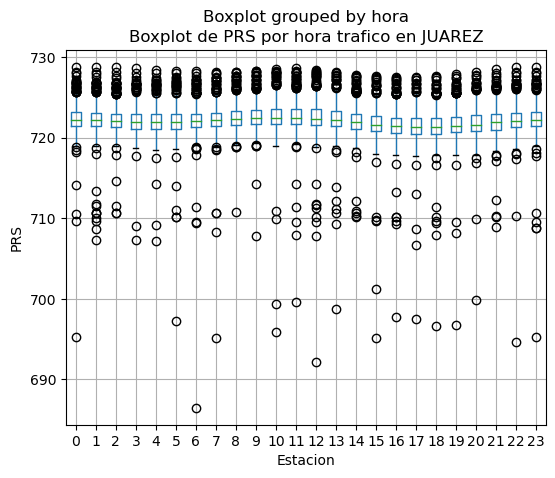

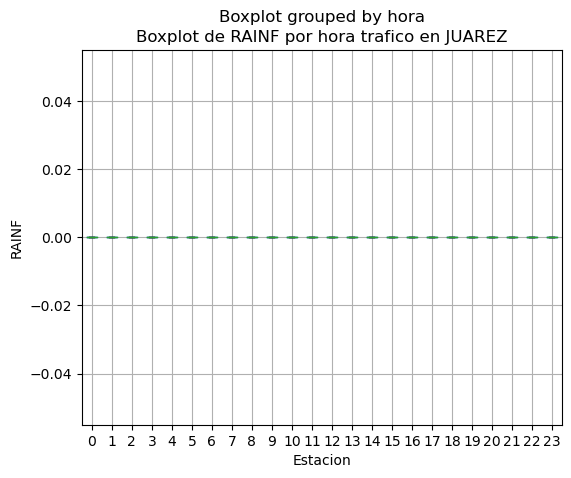

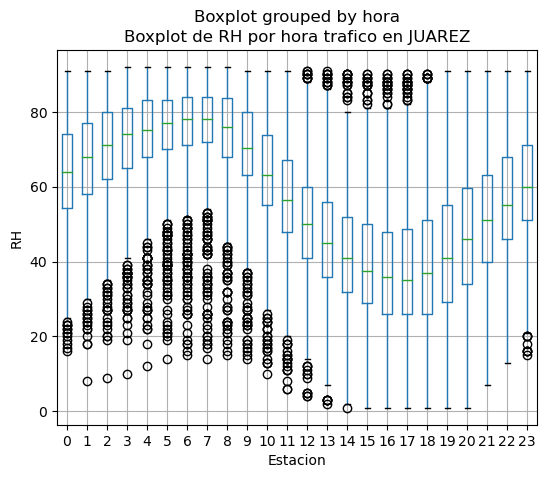

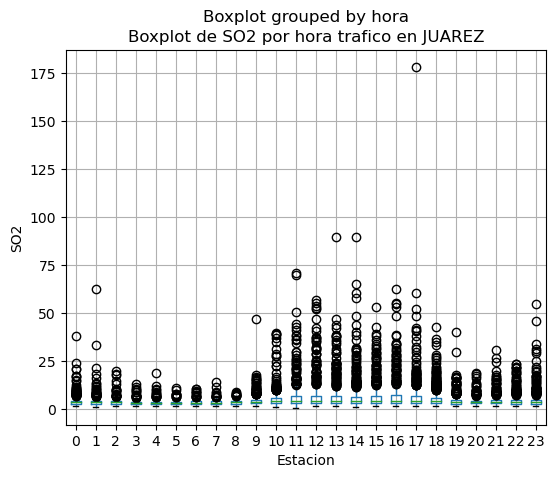

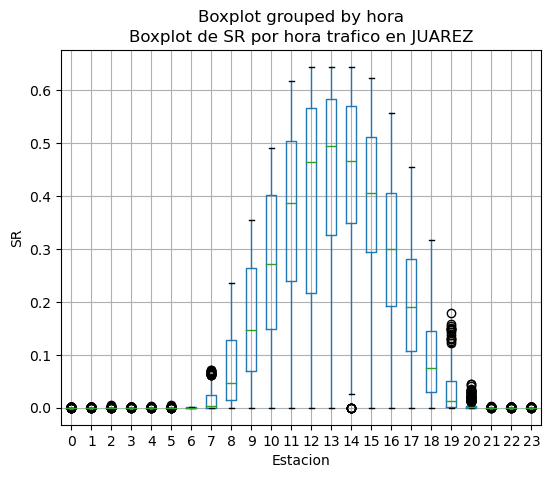

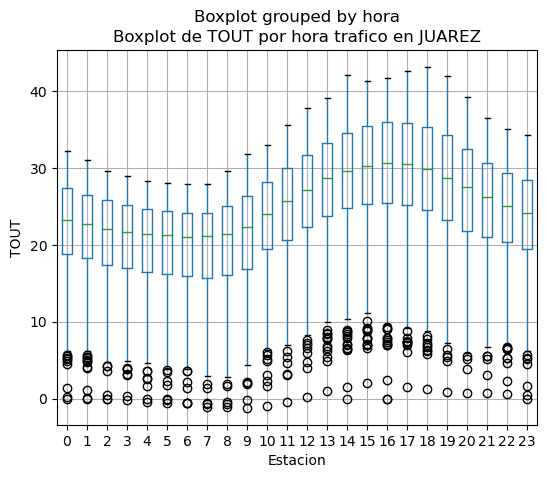

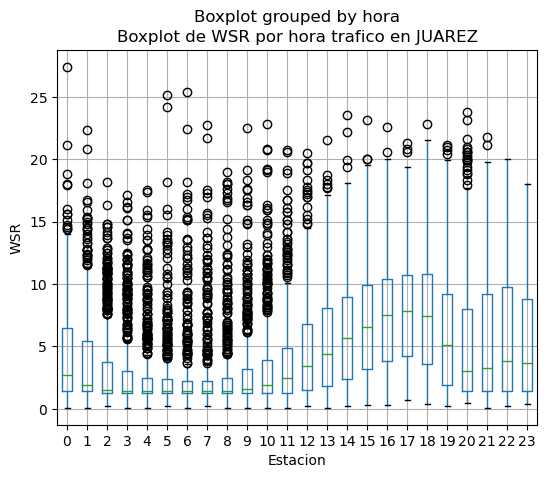

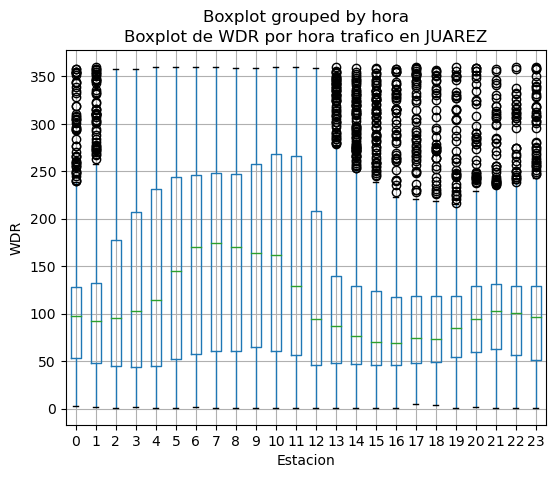

In [34]:
for columna in juarez:
    if columna != 'date' and columna != 'estacion' and columna !='hora' and columna != 'dia_semana':
        juarez.boxplot(column=columna, by='hora', grid=True, figsize=(6, 5))
        plt.title(f'Boxplot de {columna} por hora trafico en JUAREZ')
        plt.ylabel(columna)
        plt.xlabel('Estacion')
        plt.show()

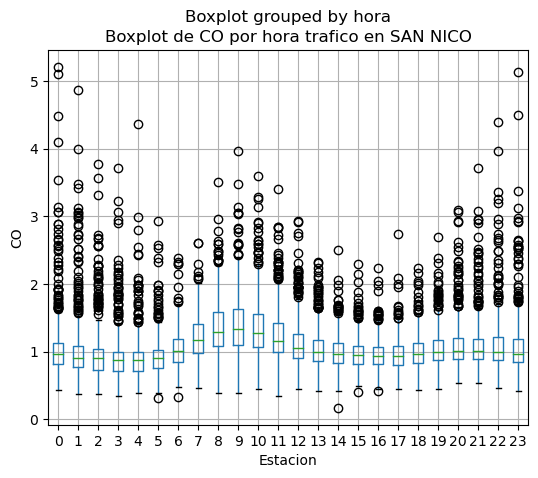

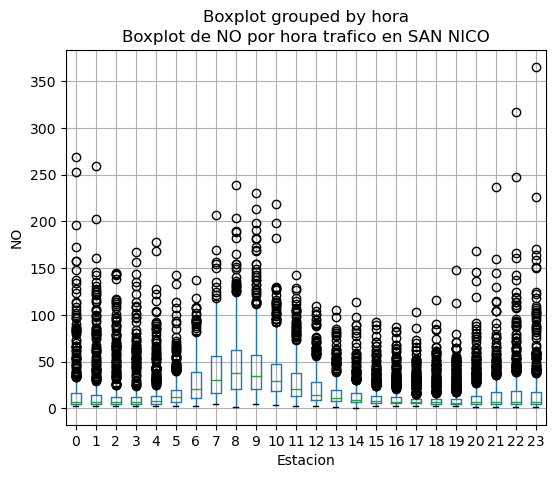

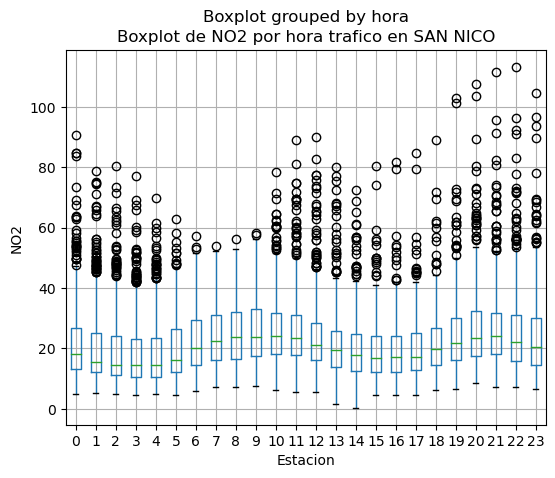

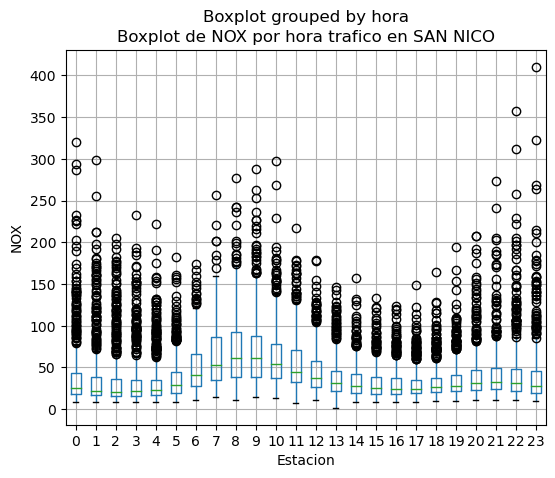

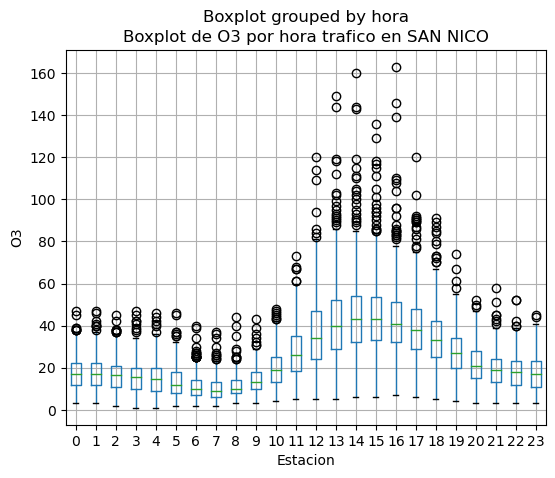

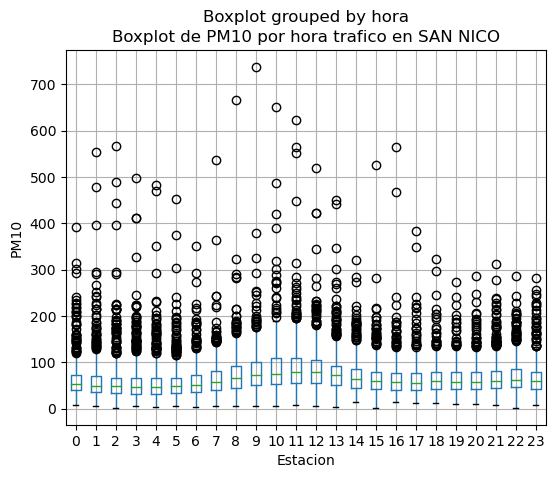

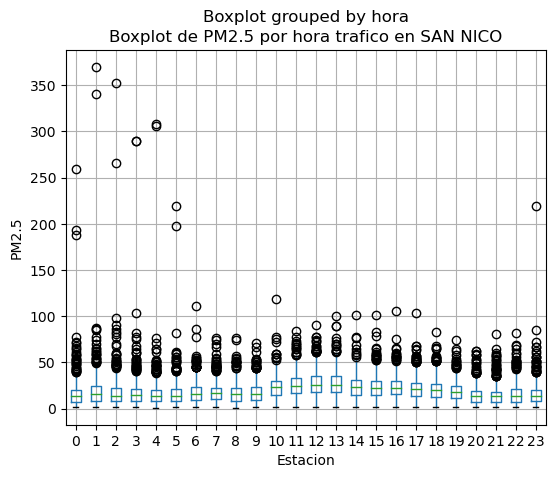

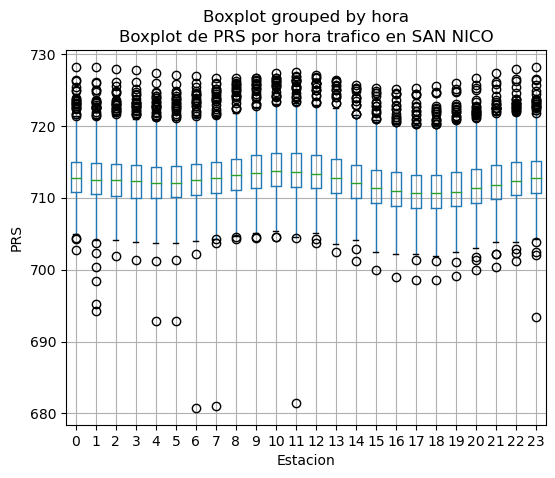

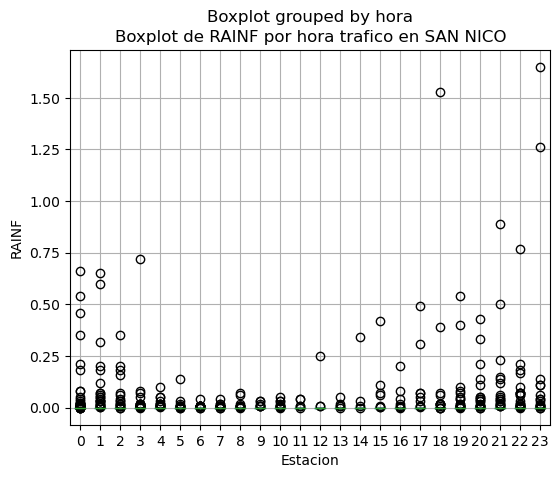

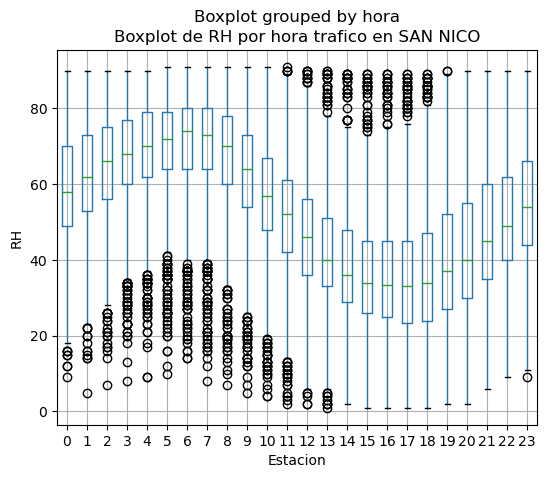

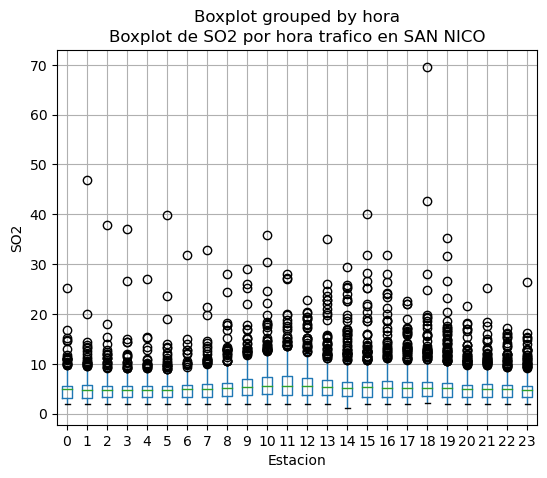

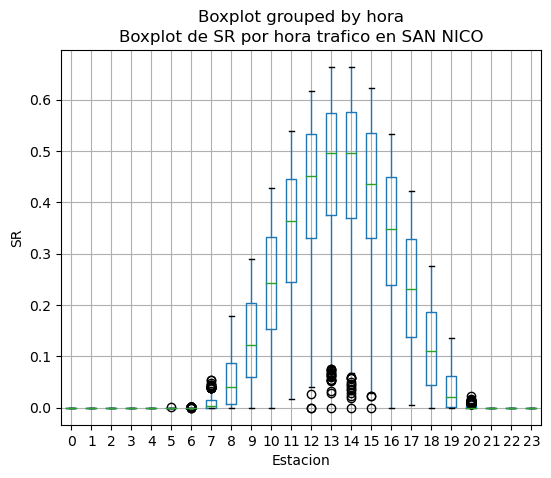

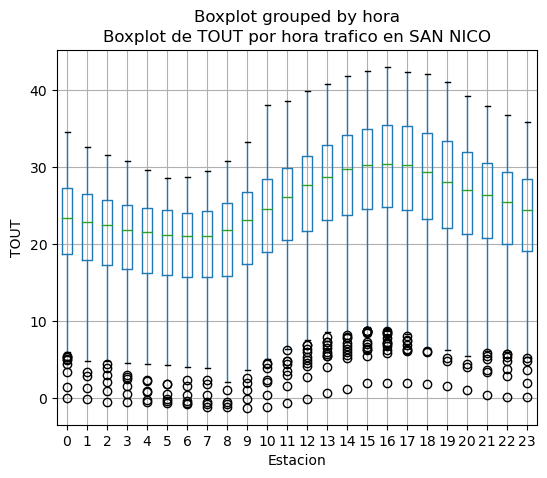

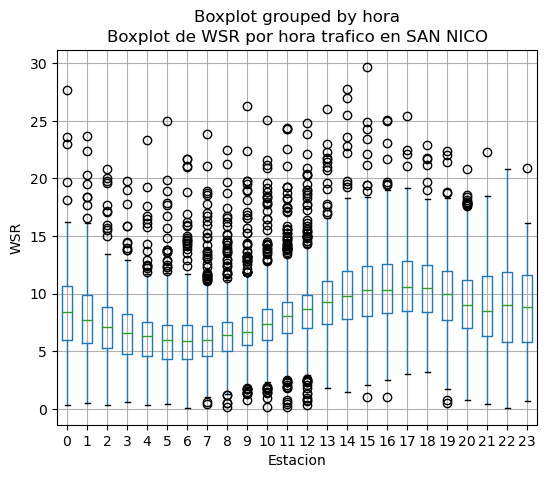

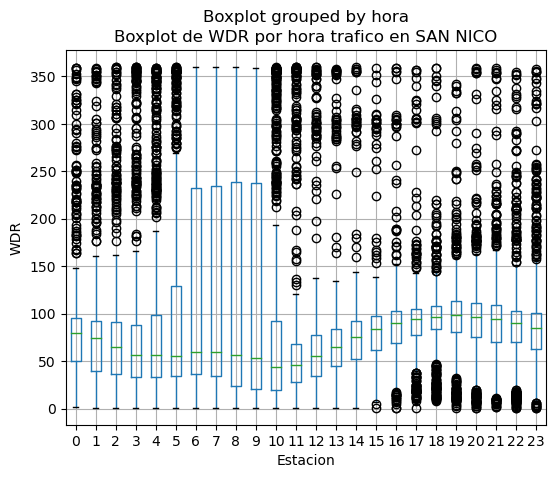

In [35]:
for columna in san_nico:
    if columna != 'date' and columna != 'estacion' and columna !='hora' and columna != 'dia_semana':
        san_nico.boxplot(column=columna, by='hora', grid=True, figsize=(6, 5))
        plt.title(f'Boxplot de {columna} por hora trafico en SAN NICO')
        plt.ylabel(columna)
        plt.xlabel('Estacion')
        plt.show()

In [36]:
print(juarez['RAINF'].value_counts())
print(san_nico['RAINF'].value_counts())
# Con el boxplot nos dimos cuenta que esta muy raro ese valor, al hacer
# el value_counts, vimos que solo hay ceros, lo vamos a quitar.
juarez = juarez.drop(columns=['RAINF'])
san_nico = san_nico.drop(columns=['RAINF'])

0.0    14256
Name: RAINF, dtype: int64
0.000000    13930
0.010000       88
0.020000       41
0.030000       21
0.040000       16
            ...  
0.660000        1
0.390000        1
0.004286        1
0.009048        1
0.001429        1
Name: RAINF, Length: 77, dtype: int64


In [37]:
juarez = juarez.drop(columns=['estacion'])
san_nico = san_nico.drop(columns=['estacion'])

In [38]:
# Ahora, ya viendo los boxplots, ya se ve por hora se ve como en la mañana y en la noche
# hay un incremento en los ocmportamientos, pero también se ven muchos valores atípicos, es por
# ellos que los vamos a recalcular

# Se recalculara el Zscore, porque ya no hay atipicos y posterior a identficar los atipicos,
# se llenara con la media

In [39]:
z_scores_san_nico_f = san_nico.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())
                                                                    /x.iloc[:, 1:].std()))

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_59865/4132468669.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  z_scores_san_nico_f = san_nico.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())


In [40]:
z_scores_san_nico_f["date"] = san_nico["date"]
z_scores_san_nico_f["dia_semana"] = san_nico["dia_semana"]
z_scores_san_nico_f["hora"] = san_nico["hora"]

In [41]:
z_scores_juarez_f = juarez.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())
                                                                    /x.iloc[:, 1:].std()))

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_59865/3040731394.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  z_scores_juarez_f = juarez.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())


In [42]:
z_scores_juarez_f["date"] = juarez["date"]
z_scores_juarez_f["dia_semana"] = juarez["dia_semana"]
z_scores_juarez_f["hora"] = juarez["hora"]

In [43]:
juarez.to_excel("juarez.xlsx", index=False)
san_nico.to_excel("san_nico.xlsx", index=False)

In [44]:
def rellenar(datos,zscores ,columnas, stds):
  for columna in columnas:
      # Calculo de medias
      valor_medio = datos.groupby(['dia_semana', 'hora'])[columna].transform('mean')
      # Rellenar los valores atípicos con las medias sin atipicos
      datos[columna] = np.where(zscores[columna] > stds, valor_medio, datos[columna])

      return datos

In [45]:
columnas = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RH', 'SO2',
       'SR', 'TOUT', 'WSR', 'WDR']

In [46]:
juarez_limpios = rellenar(juarez, z_scores_juarez_f, columnas, 3)

In [47]:
san_nico_limpios = rellenar(san_nico, z_scores_san_nico_f, columnas, 3)

In [48]:
with pd.ExcelWriter('datos_limpios.xlsx') as writer:
    juarez_limpios.to_excel(writer, sheet_name='SUREST2', index=False)
    san_nico_limpios.to_excel(writer, sheet_name='NORTE2', index=False)

# Post Limpieza de Datos:

In [49]:
san_nico = pd.read_excel('datos_limpios.xlsx', sheet_name='NORTE2')
san_nico["mes"] = san_nico["date"].dt.month
juarez["mes"] = juarez["date"].dt.month
san_nico["dia"] = san_nico["dia_semana"]

1. Medidas de Tendencia y Dispersión para San Nicolás

In [50]:
san_nico.describe()

CO            NO           NO2           NOX            O3  \
count  14256.000000  14256.000000  14256.000000  14256.000000  14256.000000   
mean       1.054590     20.461094     22.619174     43.065976     24.110266   
std        0.318258     25.081224     11.828041     33.471765     16.446976   
min        0.320000      0.600000      0.400000      1.800000      1.000000   
25%        0.850000      5.700000     13.800000     20.900000     12.000000   
50%        0.990298     10.000000     19.900000     31.700000     20.000000   
75%        1.200000     24.900000     28.400000     52.900000     32.000000   
max        3.030000    365.500000    113.300000    410.300000    163.000000   

               PM10         PM2.5           PRS            RH           SO2  \
count  14256.000000  14256.000000  14256.000000  14256.000000  14256.000000   
mean      69.083482     19.901919    712.715374     52.929606      5.392923   
std       45.546339     15.114693      4.100429     20.823141      2.974004   
min        2.000000      1.000000    680.800000      1.000000      1.200000   
25%       41.000000     11.000000    710.100000     36.000000      3.400000   
50%       59.000000     17.000000    712.300000     54.000000      5.000000   
75%       83.246914     26.000000    714.800000     70.000000      6.100000   
max      738.000000    370.000000    728.200000     91.000000     69.600000   

                 SR          TOUT           WSR           WDR    dia_semana  \
count  14256.000000  14256.000000  14256.000000  14256.000000  14256.000000   
mean       0.132309     23.919350      8.342512     95.360542      2.998316   
std        0.188201      7.684937      3.551118     84.257419      2.001332   
min        0.000000     -1.210000      0.100000      1.000000      0.000000   
25%        0.000000     19.240000      6.000000     43.000000      1.000000   
50%        0.006000     24.680000      7.900000     77.000000      3.000000   
75%        0.244000     29.200000     10.400000    102.000000      5.000000   
max        0.664000     43.020000     29.700000    360.000000      6.000000   

               hora           mes           dia  
count  14256.000000  14256.000000  14256.000000  
mean      11.500000      5.673401      2.998316  
std        6.922429      3.212211      2.001332  
min        0.000000      1.000000      0.000000  
25%        5.750000      3.000000      1.000000  
50%       11.500000      5.000000      3.000000  
75%       17.250000      8.000000      5.000000  
max       23.000000     12.000000      6.000000

2. Box plots con los datos limpios

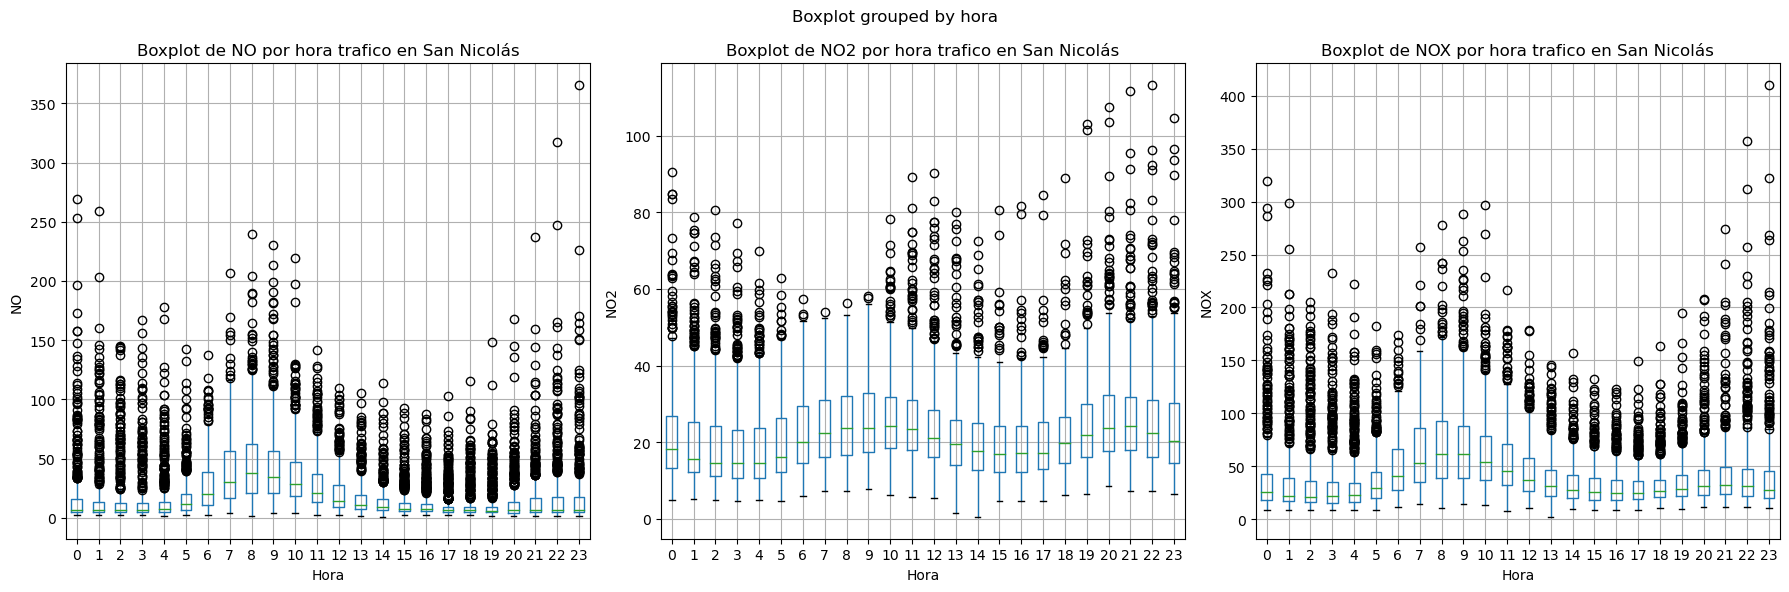

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

plot_num = 0

for columna in san_nico.columns:
    if columna == 'NO' or columna =='NO2' or columna == 'NOX':
        san_nico.boxplot(column=columna, by='hora', grid=True, ax=axes[plot_num])
        axes[plot_num].set_title(f'Boxplot de {columna} por hora trafico en San Nicolás')
        axes[plot_num].set_ylabel(columna)
        axes[plot_num].set_xlabel('Hora')
        
        plot_num += 1

plt.tight_layout()
plt.show()

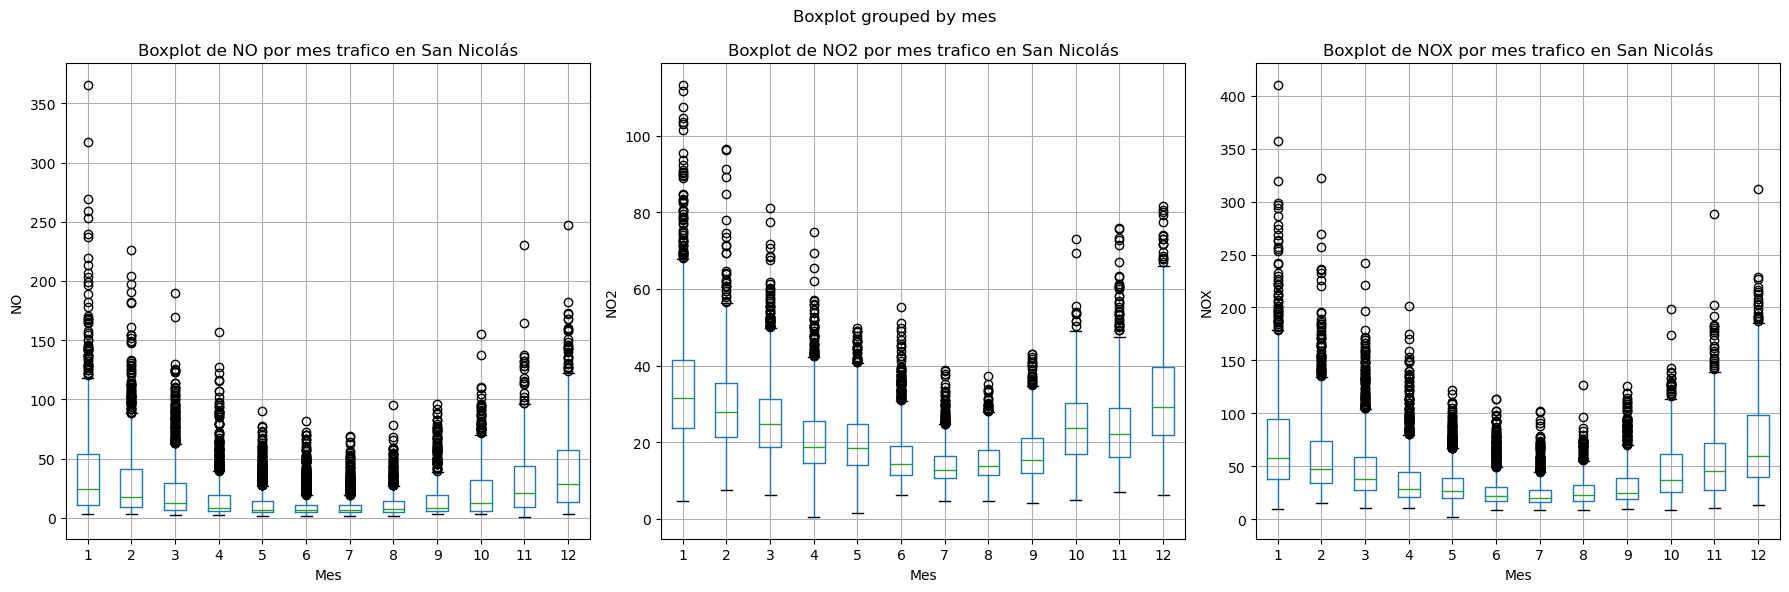

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

plot_num = 0

for columna in san_nico.columns:
    if columna == 'NO' or columna =='NO2' or columna == 'NOX':
        san_nico.boxplot(column=columna, by='mes', grid=True, ax=axes[plot_num])
        axes[plot_num].set_title(f'Boxplot de {columna} por mes trafico en San Nicolás')
        axes[plot_num].set_ylabel(columna)
        axes[plot_num].set_xlabel('Mes')
        
        plot_num += 1

plt.tight_layout()
plt.show()

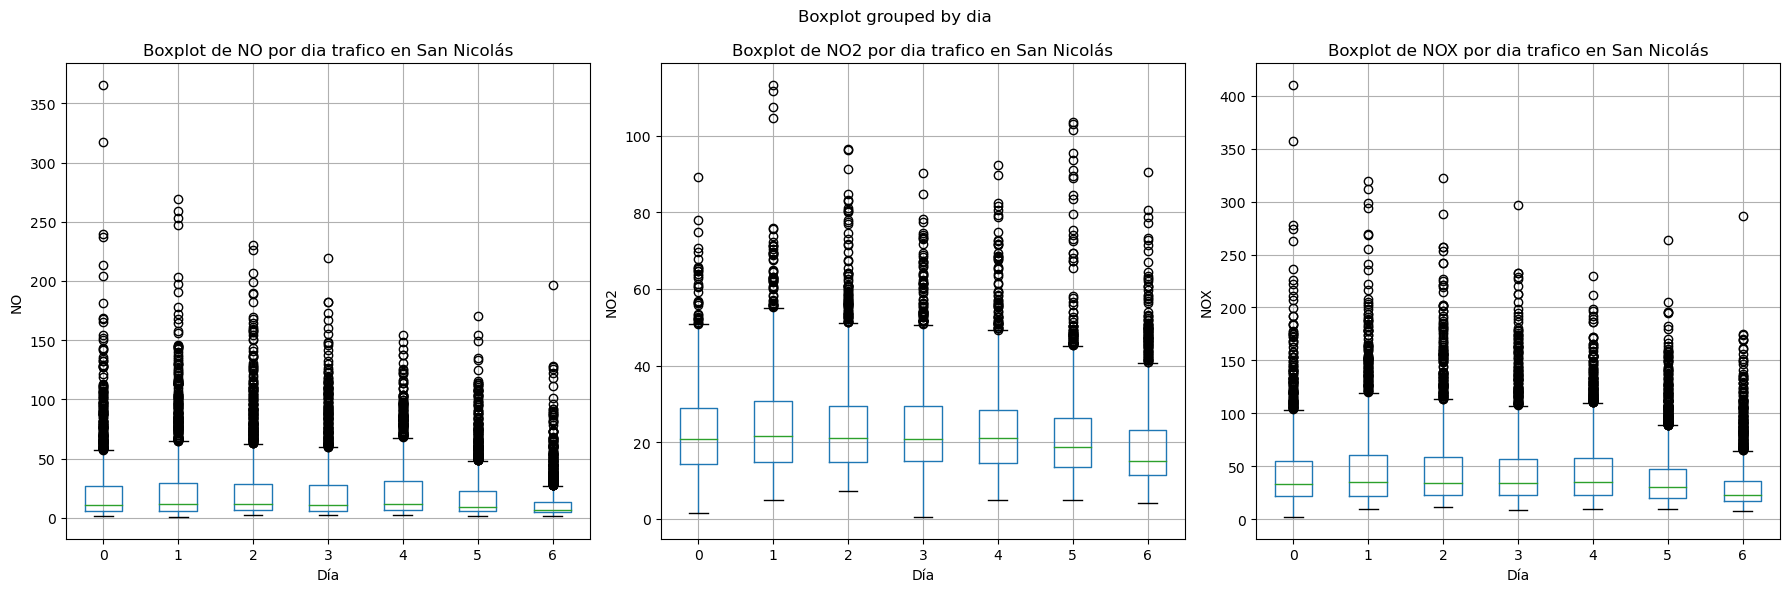

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

plot_num = 0

for columna in san_nico.columns:
    if columna != 'date' and columna != 'estacion' and columna !='hora' and columna != 'dia' and (columna == 'NO' or columna =='NO2' or columna == 'NOX'):
        san_nico.boxplot(column=columna, by='dia', grid=True, ax=axes[plot_num])
        axes[plot_num].set_title(f'Boxplot de {columna} por dia trafico en San Nicolás')
        axes[plot_num].set_ylabel(columna)
        axes[plot_num].set_xlabel('Día')
        
        plot_num += 1

plt.tight_layout()
plt.show()

3. Matriz de Correlación

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_59865/322103885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = san_nico.corr()


<Axes: >

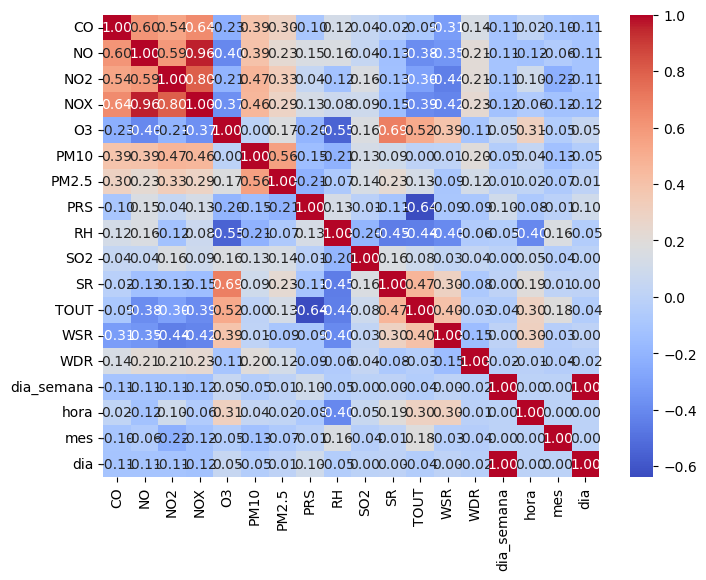

In [54]:
cor = san_nico.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")

# Predicción

In [55]:
san_nico.head()

date        CO    NO   NO2    NOX    O3   PM10  PM2.5    PRS  \
0 2022-01-01 00:00:00  1.045122  83.1  58.2  141.4  12.0  293.0  259.0  706.2   
1 2022-01-01 01:00:00  0.983412  62.1  49.4  111.5   8.0  554.0  370.0  705.8   
2 2022-01-01 02:00:00  0.932588  34.5  45.9   80.3   7.0  397.0  266.0  705.7   
3 2022-01-01 03:00:00  0.917882  53.4  45.1   98.5   8.0  412.0  290.0  705.4   
4 2022-01-01 04:00:00  0.917294  52.5  43.6   96.1   7.0  470.0  306.0  705.4   

     RH  SO2   SR   TOUT  WSR    WDR  dia_semana  hora  mes  dia  
0  60.0  6.1  0.0  22.17  1.3  290.0           5     0    1    5  
1  65.0  6.0  0.0  21.39  2.8  288.0           5     1    1    5  
2  62.0  7.6  0.0  20.95  2.8  295.0           5     2    1    5  
3  65.0  7.7  0.0  20.14  3.5  238.0           5     3    1    5  
4  67.0  7.1  0.0  19.56  3.9  257.0           5     4    1    5

### Regresión Polinómica

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = san_nico[['dia', 'mes', 'hora']]
y = san_nico['NO']

grado_polinomio = 2

poly_features = PolynomialFeatures(degree=grado_polinomio)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(X_poly, y)

predicciones = model.predict(X_poly)

mse = mean_squared_error(y, predicciones)

print(f'Error Cuadrático Medio (MSE): {mse}')



Error Cuadrático Medio (MSE): 481.16323840632106


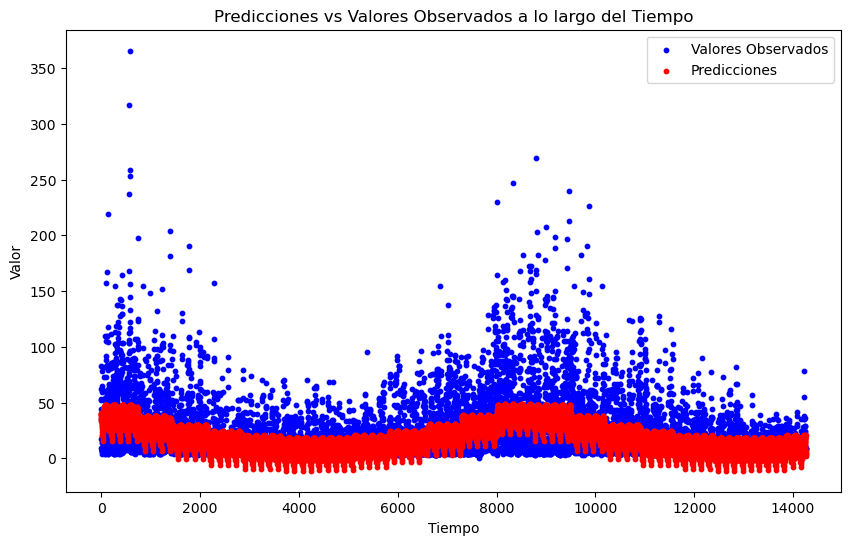

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Valores Observados', s=10)
plt.scatter(range(len(predicciones)), predicciones, color='red', label='Predicciones', s=10)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones vs Valores Observados a lo largo del Tiempo')
plt.legend()
plt.show()


### nearest neighbors

Error Cuadrático Medio (MSE): 325.25323810739593


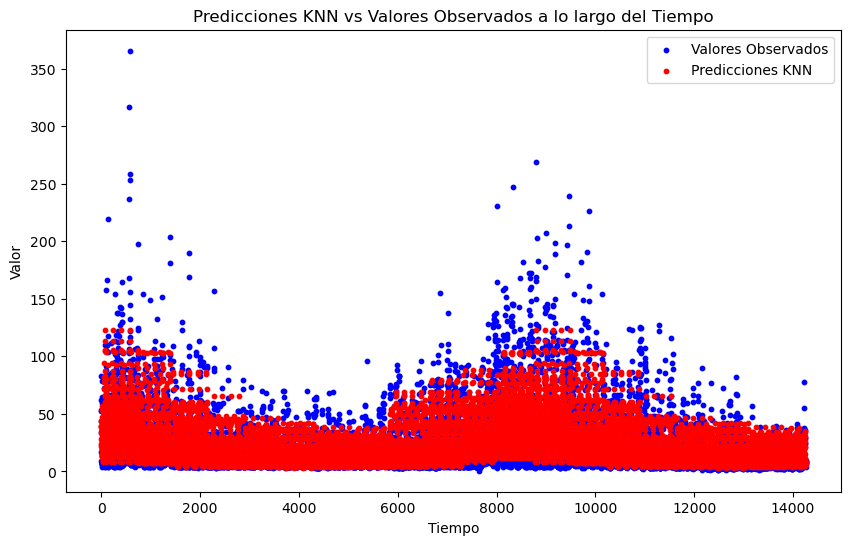

In [58]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = san_nico[['dia', 'mes', 'hora']]
y = san_nico['NO']

knn_model = KNeighborsRegressor(n_neighbors=6) 

knn_model.fit(X, y)

predicciones_knn = knn_model.predict(X)

mse = mean_squared_error(y, predicciones_knn)

print(f'Error Cuadrático Medio (MSE): {mse}')

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Valores Observados', s=10)
plt.scatter(range(len(predicciones_knn)), predicciones_knn, color='red', label='Predicciones KNN', s=10)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones KNN vs Valores Observados a lo largo del Tiempo')
plt.legend()
plt.show()


### Rregresión Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

X = san_nico[['dia', 'mes', 'hora']]
y = san_nico['NO']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 

rf_model.fit(X, y)

predicciones_rf = rf_model.predict(X)

mse_rf = mean_squared_error(y, predicciones_rf)

print(f'Error Cuadrático Medio (MSE) - Random Forest: {mse_rf}')

Error Cuadrático Medio (MSE) - Random Forest: 304.69878663037525


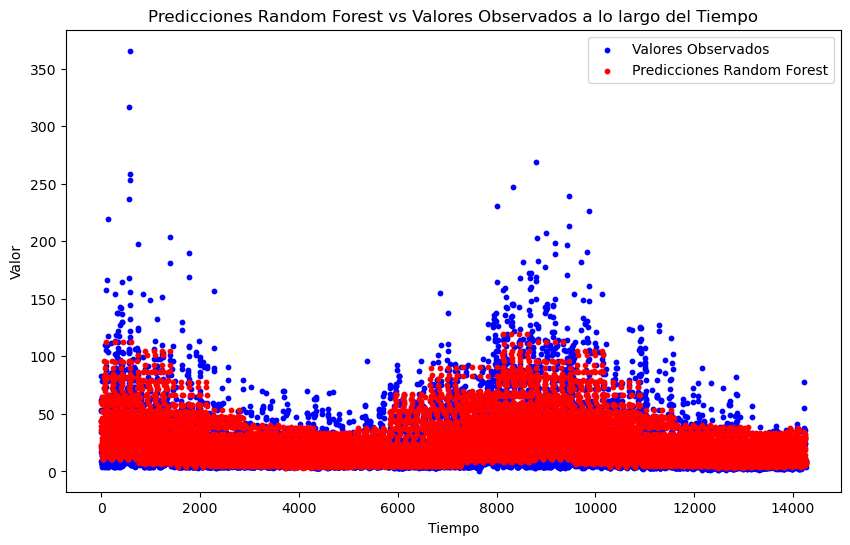

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Valores Observados', s=10)
plt.scatter(range(len(predicciones_rf)), predicciones_rf, color='red', label='Predicciones Random Forest', s=10)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones Random Forest vs Valores Observados a lo largo del Tiempo')
plt.legend()
plt.show()

### SVM - LINEAL

In [62]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X = san_nico[['dia', 'mes', 'hora']]
y = san_nico['NO']

svm_model = SVR(kernel='linear') 

svm_model.fit(X, y)

predicciones_svm_l = svm_model.predict(X)

mse_svm_l = mean_squared_error(y, predicciones_svm_l)

print(f'Error Cuadrático Medio (MSE) - SVM: {mse_svm_l}')

Error Cuadrático Medio (MSE) - SVM: 707.2362655225804


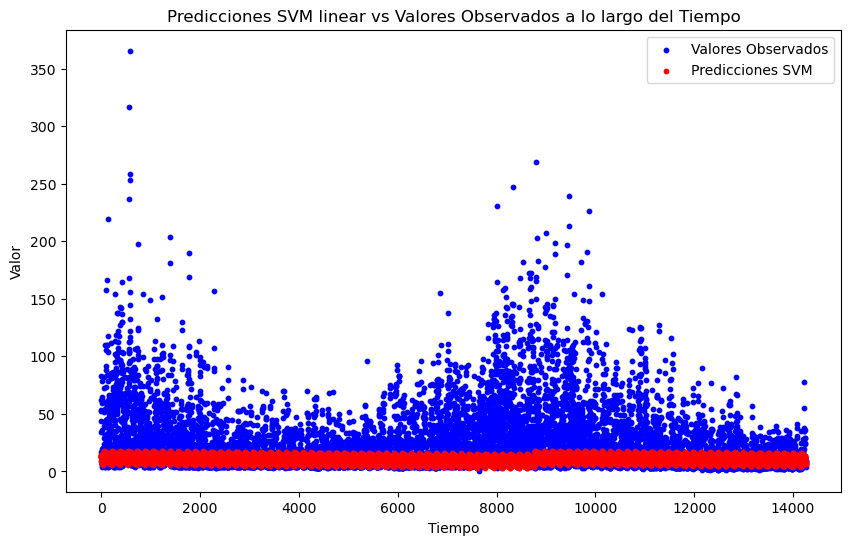

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Valores Observados', s=10)
plt.scatter(range(len(predicciones_svm_l)), predicciones_svm_l, color='red', label='Predicciones SVM', s=10)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones SVM linear vs Valores Observados a lo largo del Tiempo')
plt.legend()
plt.show()

### SVM - POLINÓMICO

In [64]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = san_nico[['dia', 'mes', 'hora']]
y = san_nico['NO']

svm_model = SVR(kernel='poly') 

svm_model.fit(X, y)

predicciones_svm_p = svm_model.predict(X)

mse_svm_p = mean_squared_error(y, predicciones_svm_p)

print(f'Error Cuadrático Medio (MSE) - SVM: {mse_svm_p}')

Error Cuadrático Medio (MSE) - SVM: 637.2214353841765


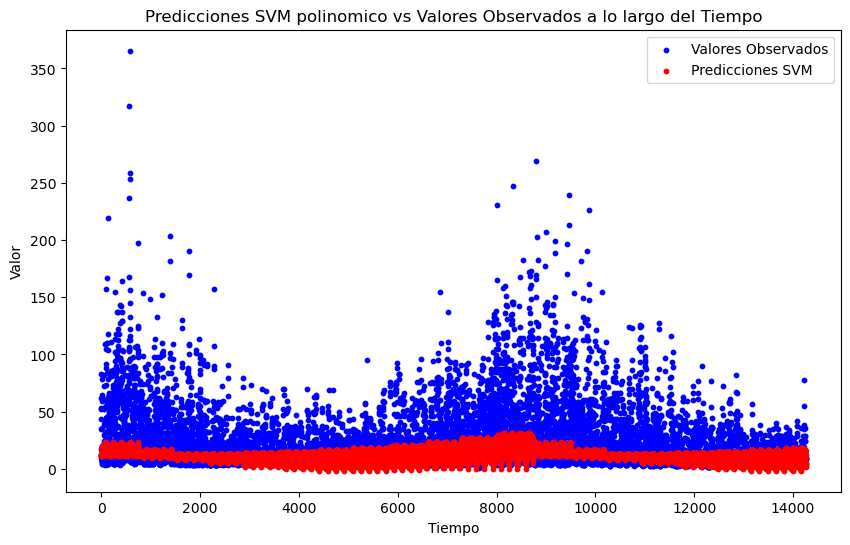

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Valores Observados', s=10)
plt.scatter(range(len(predicciones_svm_p)), predicciones_svm_p, color='red', label='Predicciones SVM', s=10)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones SVM polinomico vs Valores Observados a lo largo del Tiempo')
plt.legend()
plt.show()

### SVM - RBF

In [66]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = san_nico[['dia', 'mes', 'hora']]
y = san_nico['NO']

svm_model = SVR(kernel='rbf', gamma=0.7) 

svm_model.fit(X, y)

predicciones_svm_rbf = svm_model.predict(X)

mse_svm_rbf = mean_squared_error(y, predicciones_svm_rbf)

print(f'Error Cuadrático Medio (MSE) - SVM: {mse_svm_rbf}')

Error Cuadrático Medio (MSE) - SVM: 453.51956541717925


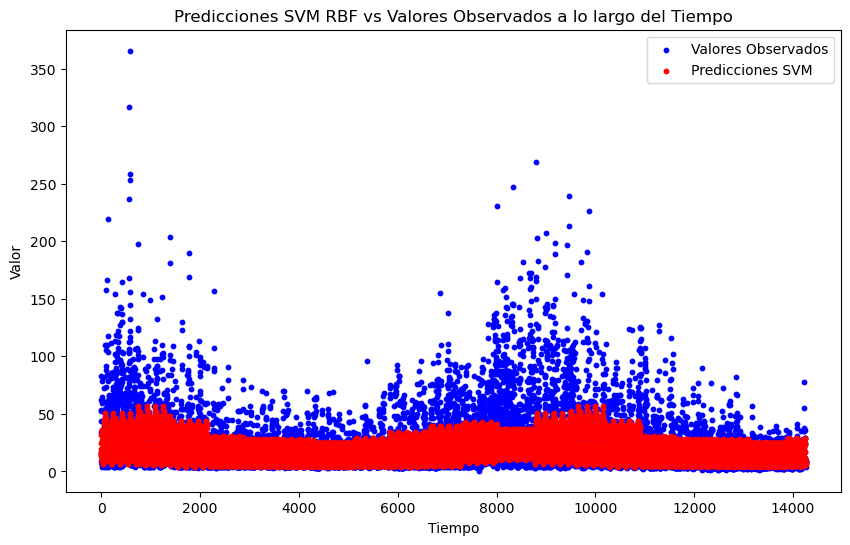

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Valores Observados', s=10)
plt.scatter(range(len(predicciones_svm_rbf)), predicciones_svm_rbf, color='red', label='Predicciones SVM', s=10)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones SVM RBF vs Valores Observados a lo largo del Tiempo')
plt.legend()
plt.show()

### Red neuronal

Epoch 1/250
286/286 [==============================] - 1s 1ms/step - loss: 511.2700 - val_loss: 310.2155
Epoch 2/250
286/286 [==============================] - 0s 601us/step - loss: 185.7321 - val_loss: 112.6422
Epoch 3/250
286/286 [==============================] - 0s 615us/step - loss: 111.0591 - val_loss: 102.1518
Epoch 4/250
286/286 [==============================] - 0s 586us/step - loss: 104.2165 - val_loss: 97.0180
Epoch 5/250
286/286 [==============================] - 0s 595us/step - loss: 100.3437 - val_loss: 94.2324
Epoch 6/250
286/286 [==============================] - 0s 585us/step - loss: 98.1963 - val_loss: 92.6797
Epoch 7/250
286/286 [==============================] - 0s 603us/step - loss: 96.9731 - val_loss: 91.5465
Epoch 8/250
286/286 [==============================] - 0s 763us/step - loss: 96.1685 - val_loss: 90.9583
Epoch 9/250
286/286 [==============================] - 0s 612us/step - loss: 95.6523 - val_loss: 90.6798
Epoch 10/250
286/286 [===========================

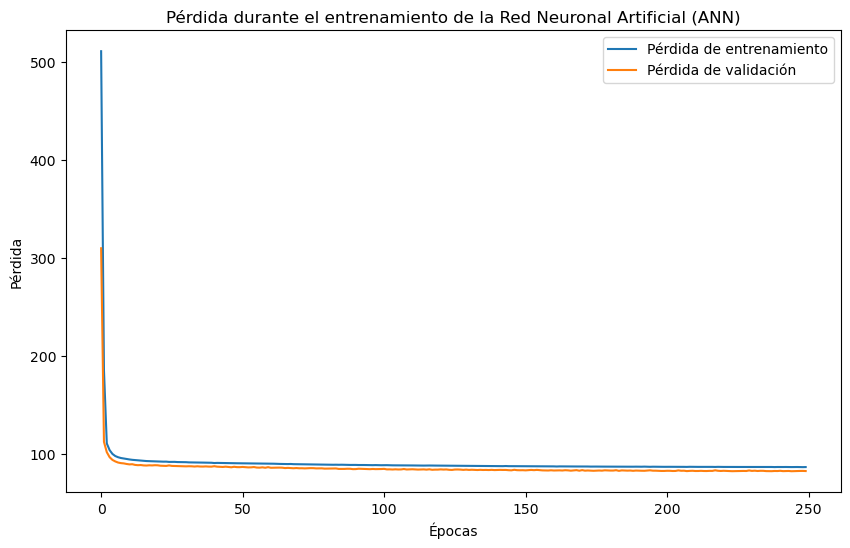

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

X = san_nico[['dia', 'mes', 'hora']]
y = san_nico['NO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  
model.add(Dense(1, activation='linear'))  

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=250, batch_size=32, validation_split=0.2, verbose=1)

predicciones_ann = model.predict(X_test_scaled).flatten()

mse_ann = mean_squared_error(y_test, predicciones_ann)

print(f'Error Cuadrático Medio (MSE) - Red Neuronal Artificial (ANN): {mse_ann}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento de la Red Neuronal Artificial (ANN)')
plt.show()


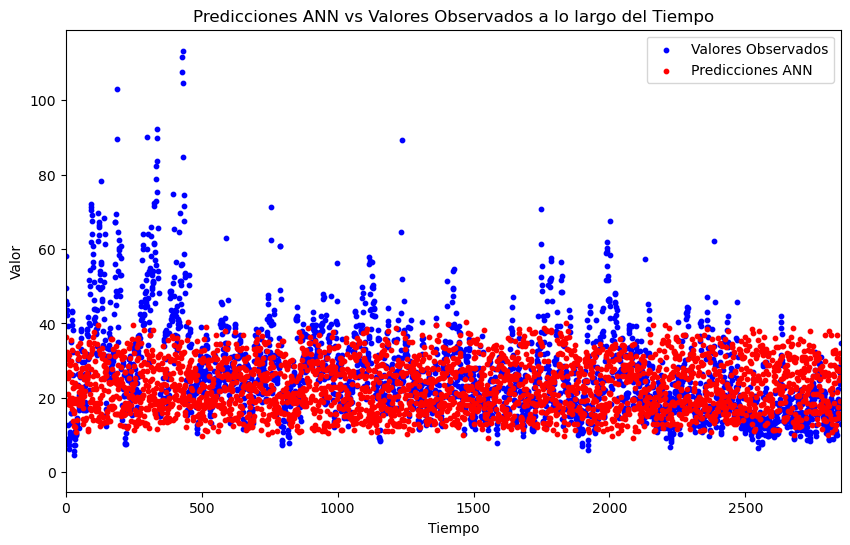

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Valores Observados', s=10)
plt.scatter(range(len(predicciones_ann)), predicciones_ann, color='red', label='Predicciones ANN', s=10)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones ANN vs Valores Observados a lo largo del Tiempo')

plt.xlim(0, len(predicciones_ann))

plt.legend()
plt.show()


### RNN

Epoch 1/250
286/286 [==============================] - 2s 2ms/step - loss: 990.9343 - val_loss: 893.3890
Epoch 2/250
286/286 [==============================] - 0s 990us/step - loss: 765.4582 - val_loss: 685.2502
Epoch 3/250
286/286 [==============================] - 0s 969us/step - loss: 635.6338 - val_loss: 627.8753
Epoch 4/250
286/286 [==============================] - 0s 1ms/step - loss: 607.9821 - val_loss: 617.1826
Epoch 5/250
286/286 [==============================] - 0s 1ms/step - loss: 598.8829 - val_loss: 606.7406
Epoch 6/250
286/286 [==============================] - 0s 977us/step - loss: 587.2092 - val_loss: 591.9808
Epoch 7/250
286/286 [==============================] - 0s 919us/step - loss: 572.2593 - val_loss: 574.5626
Epoch 8/250
286/286 [==============================] - 0s 912us/step - loss: 555.7318 - val_loss: 556.5669
Epoch 9/250
286/286 [==============================] - 0s 1ms/step - loss: 539.2291 - val_loss: 539.0979
Epoch 10/250
286/286 [=======================

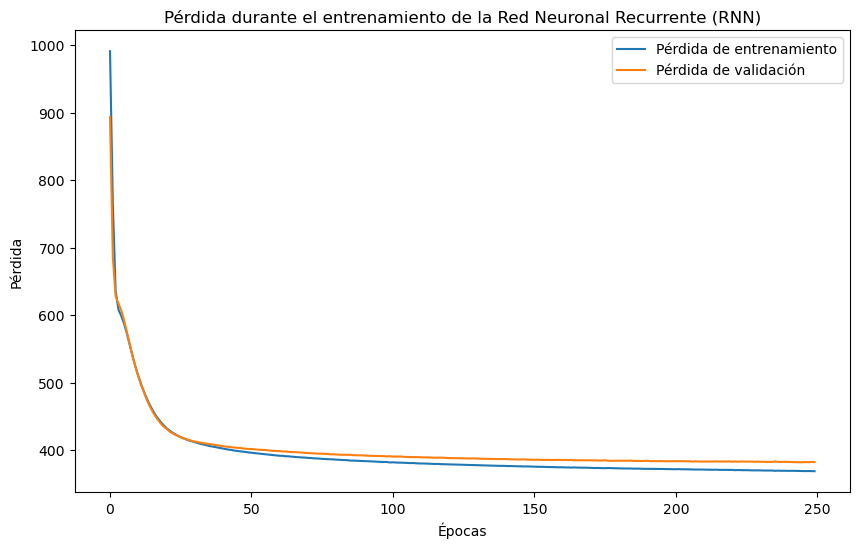

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = san_nico[['dia', 'mes', 'hora']]
y = san_nico['NO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_reshaped, y_train, epochs=250, batch_size=32, validation_split=0.2, verbose=1)

predicciones_rnn = model.predict(X_test_reshaped).flatten()

mse_rnn = mean_squared_error(y_test, predicciones_rnn)

print(f'Error Cuadrático Medio (MSE) - Red Neuronal Recurrente (RNN): {mse_rnn}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento de la Red Neuronal Recurrente (RNN)')
plt.show()


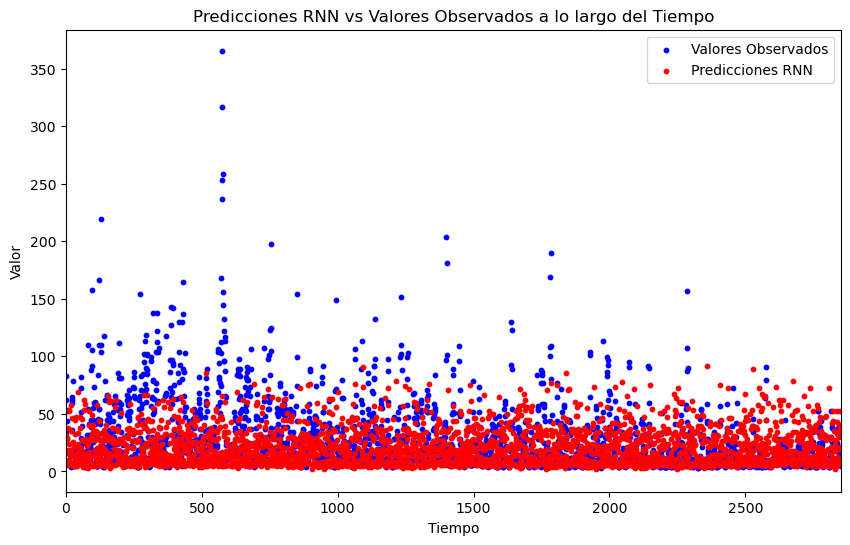

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Valores Observados', s=10)
plt.scatter(range(len(predicciones_rnn)), predicciones_rnn, color='red', label='Predicciones RNN', s=10)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones RNN vs Valores Observados a lo largo del Tiempo')

plt.xlim(0, len(predicciones_rnn))

plt.legend()
plt.show()


### ARIMA

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

y = san_nico['NO']

train_size = int(0.8 * len(y))
train, test = y[:train_size], y[train_size:]

p, d, q = 2, 1, 0 
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

predictions_ar = model_fit.forecast(steps=len(test))

mse_arima = mean_squared_error(test, predictions_ar)

print(f'Error Cuadrático Medio (MSE) - ARIMA: {mse_arima}')


Error Cuadrático Medio (MSE) - ARIMA: 165.87083026204027


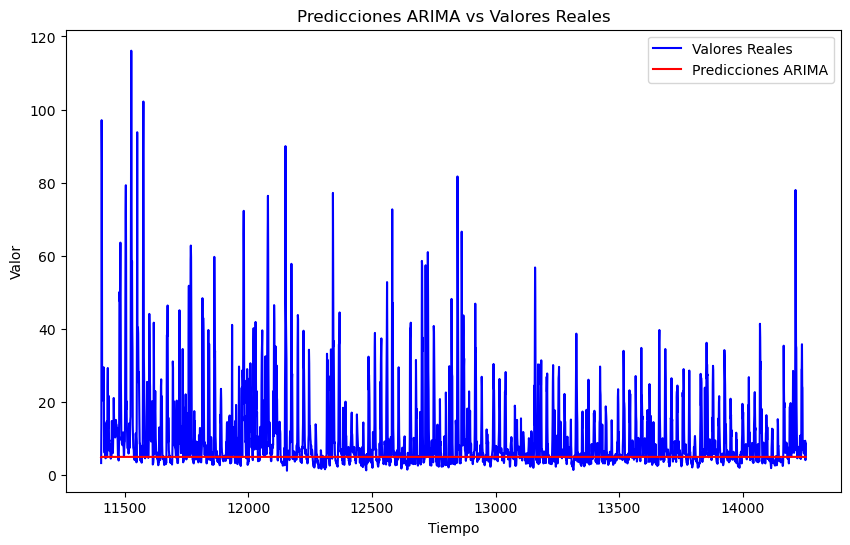

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Valores Reales', color='blue')
plt.plot(test.index, predictions_ar, label='Predicciones ARIMA', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones ARIMA vs Valores Reales')
plt.legend()
plt.show()


### SARIMA

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

y = san_nico['NO']

train_size = int(0.8 * len(y))
train, test = y[:train_size], y[train_size:]

p, d, q = 2, 1, 1  
P, D, Q, s = 1, 0, 1, 24 

model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=False)

start_index = len(train)
end_index = start_index + len(test) - 1
predictions_sar = model_fit.predict(start=start_index, end=end_index, dynamic=False)

mse_sarima = mean_squared_error(test, predictions_sar)

print(f'Error Cuadrático Medio (MSE) - SARIMA: {mse_sarima}')



/Users/valeriaserna/anaconda3/envs/TC2004B/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/valeriaserna/anaconda3/envs/TC2004B/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/valeriaserna/anaconda3/envs/TC2004B/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/valeriaserna/anaconda3/envs/TC2004B/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA p

Error Cuadrático Medio (MSE) - SARIMA: 83.8239275860914


/Users/valeriaserna/anaconda3/envs/TC2004B/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/valeriaserna/anaconda3/envs/TC2004B/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


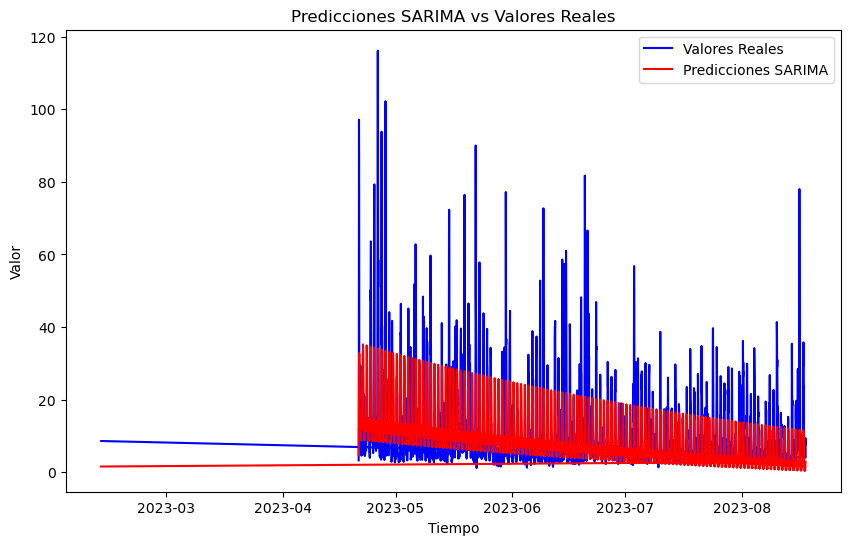

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test.values, label='Valores Reales', color='blue')
plt.plot(test.index, predictions_sar, label='Predicciones SARIMA', color='red')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones SARIMA vs Valores Reales')
plt.legend()
plt.show()

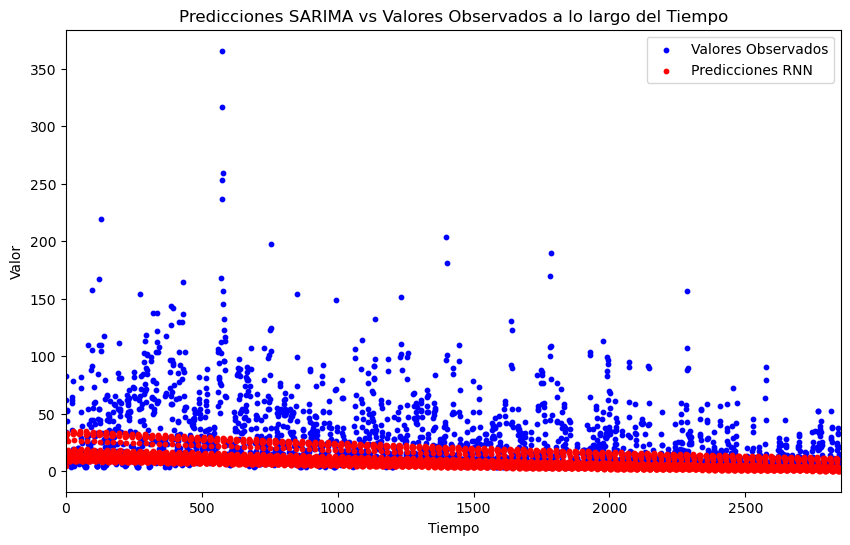

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Valores Observados', s=10)
plt.scatter(range(len(predictions_sar)), predictions_sar, color='red', label='Predicciones RNN', s=10)
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones SARIMA vs Valores Observados a lo largo del Tiempo')

plt.xlim(0, len(predictions_sar))

plt.legend()
plt.show()


### Intento al desestacionalizar y estacionalizar otra vez

In [85]:
from pmdarima import auto_arima

training = san_nico.iloc[:-150,:]
test = san_nico.iloc[-150:,:]

model = auto_arima(y = training.NO2, seasonal=True, m = 24)